# Trexquant Internship Kaggle Competition - Template Notebook

---
**<center>Welcome to the Trexquant Internship Kaggle Competition!</center>**

### Background 

Publicly traded US companies must report their earnings four times a year during what are known as **earnings announcement periods**. These periods often bring heightened scrutiny from investors, leading to increased stock returns. Stock prices can fluctuate dramatically around these announcements: if earnings are released before the market opens, prices may change significantly that day; if released after closing, the following day could see notable shifts. This creates unique opportunities for profit, as investors can capitalize on these stock price movements.

### Overview

In this challenge, you will use the provided features to **predict stock returns on earnings announcement days**. This involves both <u>feature engineering</u> and <u>machine learning modeling</u> to improve the accuracy of your predictions.

Use this notebook as a starting point for the Kaggle competition. The notebook includes examples of loading the provided data, conducting exploratory data analysis (EDA), creating and fitting a simple linear regression model, and generating predictions for submission. You are encouraged to build upon and enhance this baseline notebook.

---

## Imports

In [246]:
!ls /kaggle/input/interncompetitionnotebook

TQ_Test_Kaggle.csv  TQ_Train_Kaggle.csv


In [247]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:20.2f}'.format)
pd.set_option('display.max_colwidth', None)

## Load Training Dataset
Load and review Training Dataset

---

## Table Documentation
### - Target

| Column Name | Description                          |
| ----------- | ------------------------------------ |
| **target**  | Stock return on earnings announcement days |

### - Features
**Note:** all feature columns are prefiex by a character `f`, for example: `f1, f2, ..., f87`.

| Column Name        | Description                                                                   | 
| ------------------ | ----------------------------------------------------------------------------- | 
| **f1** | Feature 1 | 
| **f2** | Feature 2 | 
| **f{i}** | Feature {i} |
| **f87** | Feature 87 |

In [248]:
import pandas as pd

# Load the training data
df_train = pd.read_csv("/kaggle/input/interncompetitionnotebook/TQ_Train_Kaggle.csv")
df_train = df_train.fillna(df_train.mean())

# Display the shape of the dataframe
print("Shape of the training dataset:", df_train.shape)

# Display the column names of the dataframe
print("\nColumns in the training dataset:\n", list(df_train.columns))

# Extract feature columns: columns that are prefixed with 'f'
feature_prefix = 'f'
feats = [col for col in df_train.columns if col.startswith(feature_prefix)]

# Display the number of feature columns and their names
print("\nNumber of feature columns:", len(feats))
print("\nFeature columns:\n", feats)

Shape of the training dataset: (105442, 89)

Columns in the training dataset:
 ['row_id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'target']

Number of feature columns: 87

Feature columns:
 ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37',

---

## Exploratory Data Analysis

In this Exploratory Data Analysis (EDA) section, we aim to provide an initial overview of the dataset by calculating **key descriptive statistics** for each feature. 

We begin by loading the training dataset and extracting the feature columns. For each feature, we compute various statistics such as **count, mean, median, percentiles, and the number of positive, negative, and NaN values**. 

This process helps us understand the distribution and characteristics of the features, enabling us to identify potential patterns and anomalies in the data. The resulting statistics are displayed in a structured DataFrame for easy interpretation and further analysis.

In [249]:
# Function to get descriptive statistics for a given array
def get_descriptive_statistics(arr):
    # Total number of values in the array
    num_values = len(arr)
    
    # Count NaN values
    num_nan_values = np.isnan(arr).sum()
    
    # Filter finite and non-zero values
    finite_non_zero_values = arr[np.isfinite(arr) & (arr != 0)]
    num_finite_non_zero_values = len(finite_non_zero_values)
    
    # Count positive and negative values
    num_positive_values = (finite_non_zero_values > 0).sum()
    num_negative_values = (finite_non_zero_values < 0).sum()

    # Calculate descriptive statistics if there are finite non-zero values
    if num_finite_non_zero_values > 0:
        percentiles = np.percentile(finite_non_zero_values, [25, 50, 75])
        median = np.median(finite_non_zero_values)
        mean = np.mean(finite_non_zero_values)
        max_value = np.max(finite_non_zero_values)
        min_value = np.min(finite_non_zero_values)
    else:
        percentiles = [np.nan, np.nan, np.nan]
        median = np.nan
        mean = np.nan
        max_value = np.nan
        min_value = np.nan

    return {
        "count_of_values": num_values,
        "count_of_nan_values": num_nan_values,
        "count_finite_non_zero": num_finite_non_zero_values,
        "count_of_positive": num_positive_values,
        "count_of_negative": num_negative_values,
        "25th_percentile": percentiles[0],
        "50th_percentile": percentiles[1],
        "75th_percentile": percentiles[2],
        "mean": mean,
        "max": max_value,
        "min": min_value
    }

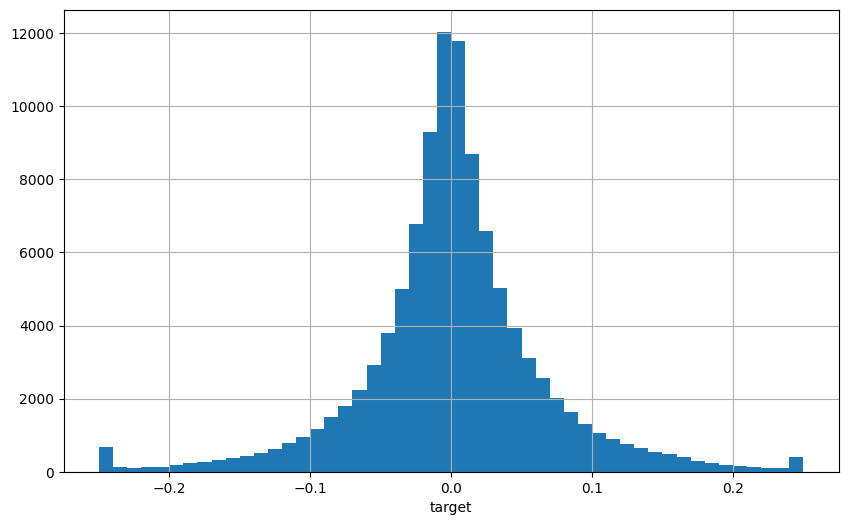

In [250]:
# Function to plot histogram of any column in the dataframe
%matplotlib inline
def hist_show(df, fname):
    df[fname].hist(bins=50,figsize=(10, 6))
    plt.xlabel(fname)
    plt.show()    
    return

# Distribution of the target
hist_show(df_train,'target')

In [251]:
# Initialize a list to record descriptive statistics for each feature
data_stats_recorder = []

# Calculate and record descriptive statistics for each feature
for f in feats:
    feat_array = np.array(df_train[f])
    data_stats = get_descriptive_statistics(feat_array)
    data_stats_recorder.append(data_stats)

# Convert the list of dictionaries to a DataFrame
df_data_stats = pd.DataFrame(data_stats_recorder, index=feats)

# Transpose the DataFrame for better readability
df_data_stats = df_data_stats.T

# Display the DataFrame of descriptive statistics
display(df_data_stats)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87
count_of_values,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00
count_of_nan_values,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
count_finite_non_zero,105442.00,105442.00,105442.00,99578.00,90534.00,103494.00,105442.00,105442.00,105426.00,105442.00,105442.00,105442.00,105433.00,105442.00,105426.00,105442.00,105373.00,105442.00,105353.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,105439.00,105442.00,104232.00,105234.00,105442.00,105442.00,18455.00,105412.00,105442.00,105442.00,105435.00,105442.00,105442.00,105442.00,105442.00,105425.00,105442.00,105442.00,105421.00,105442.00,105442.00,105442.00,105348.00,105282.00,105430.00,105442.00,105442.00,105442.00,105442.00,102942.00,105442.00,105442.00,105442.00,105442.00,105442.00,105442.00,97112.00,105442.00,105442.00,105358.00,83391.00,101406.00,105376.00,86558.00,105442.00,105385.00,105442.00,105398.00,105407.00,105402.00,105160.00,105442.00,105442.00,105442.00,105404.00,105392.00,105242.00,105442.00,105442.00,105442.00,105427.00
count_of_positive,47243.00,46250.00,88894.00,99578.00,90534.00,49719.00,13916.00,61343.00,50140.00,4475.00,15676.00,16411.00,32765.00,65192.00,74543.00,8588.00,52850.00,60649.00,52682.00,4018.00,29330.00,80665.00,26242.00,39890.00,19715.00,73244.00,60878.00,34615.00,22338.00,105234.00,44917.00,81804.00,18455.00,105412.00,90674.00,25338.00,319.00,3317.00,42949.00,13394.00,856.00,60794.00,44455.00,29404.00,73933.00,11655.00,93950.00,2833.00,105348.00,41554.00,105430.00,61095.00,47113.00,49127.00,58740.00,102942.00,51045.00,56627.00,46991.00,54467.00,75221.00,6563.00,97112.00,56126.00,49011.00,43296.00,41253.00,25662.00,105376.00,37189.00,76834.00,105385.00,2761.00,105398.00,105407.00,105402.00,44188.00,105442.00,50814.00,94834.00,105404.00,105392.00,105242.00,64952.00,40650.00,103026.00,57904.00
count_of_negative,58199.00,59192.00,16548.00,0.00,0.00,53775.00,91526.00,44099.00,55286.00,100967.00,89766.00,89031.00,72668.00,40250.00,30883.00,96854.00,52523.00,44793.00,52671.00,101424.00,76112.00,24777.00,79200.00,65552.00,85727.00,32198.00,44561.00,70827.00,81894.00,0.00,60525.00,23638.00,0.00,0.00,14768.00,80104.00,105116.00,102125.00,62493.00,92048.00,104586.00,44631.00,60987.00,76038.00,31488.00,93787.00,11492.00,102609.00,0.00,63728.00,0.00,44347.00,58329.00,56315.00,46702.00,0.00,54397.00,48815.00,58451.00,50975.00,30221.00,98879.00,0.00,49316.00,56431.00,62062.00,42138.00,75744.00,0.00,49369.00,28608.00,0.00,

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='f32', ylabel='Count'>

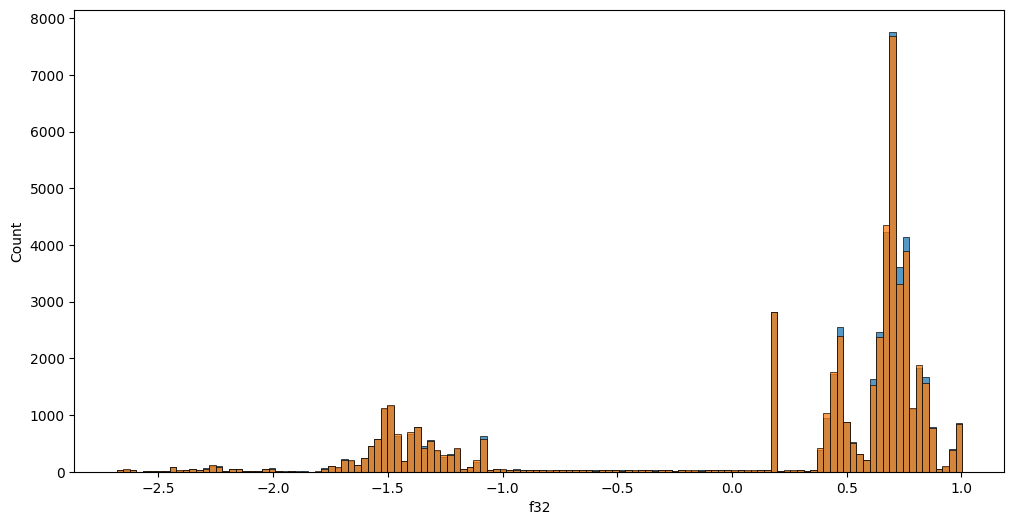

In [252]:
# i have to find the correlation between the all 75 features and target 
# i have to find the correlation between the 75 features and target sign
# i have to find the correlation between 75 features and positive target values
# i have to fint the correlation between 75 features and negative target values
# it will finally become the classification + regression model
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df_train[df_train['target']>0]['f32'])
sns.histplot(df_train[df_train['target']<0]['f32'])

In [ ]:
# The histplots are very similar to each other , i have checked till 32
# Lets see the correlations between them
df_train.corr()

,row_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,target
row_id,1.00,0.00,0.01,0.00,-0.06,0.02,-0.01,0.01,0.00,0.01,-0.01,0.01,0.01,-0.02,-0.02,-0.01,0.07,-0.01,0.11,0.01,0.00,-0.01,0.00,-0.04,0.12,-0.06,0.04,0.00,0.08,-0.01,-0.02,0.01,-0.04,-0.04,-0.04,0.06,0.03,-0.00,0.01,-0.00,0.07,0.00,-0.06,-0.03,0.01,0.02,-0.00,0.00,-0.02,0.00,0.08,0.06,-0.00,-0.02,-0.01,0.03,-0.01,-0.00,-0.02,0.00,-0.00,-0.03,-0.00,-0.00,-0.00,0.01,-0.00,-0.01,0.17,0.03,0.07,0.08,-0.01,0.09,-0.03,-0.03,0.02,-0.01,0.01,-0.00,0.00,-0.02,0.03,0.00,0.02,-0.08,-0.08,-0.07,-0.00
f1,0.00,1.00,-0.01,0.00,0.01,0.01,0.31,0.01,0.09,0.01,0.01,0.00,0.00,-0.02,0.01,-0.00,-0.00,0.02,0.55,0.00,0.00,0.00,-0.00,-0.02,-0.00,0.06,0.18,0.11,0.00,0.15,-0.00,-0.00,0.00,0.00,-0.00,0.02,-0.01,-0.00,0.00,0.01,0.01,-0.00,0.00,-0.00,0.02,-0.00,-0.00,-0.00,-0.02,0.00,0.00,-0.00,-0.12,0.01,0.01,-0.00,0.01,0.00,-0.03,0.01,0.00,0.01,-0.00,0.01,0.00,0.01,0.00,-0.00,0.00,-0.01,0.01,-0.01,-0.03,0.00,0.01,-0.00,-0.01,0.02,-0.02,0.02,0.01,0.01,-0.00,-0.00,-0.00,0.02,-0.01,0.02,-0.03
f2,0.01,-0.01,1.00,-0.00,0.00,0.00,-0.01,0.03,0.06,0.00,0.03,0.00,0.00,-0.00,0.01,-0.00,-0.00,-0.46,-0.02,0.03,0.00,-0.00,0.01,-0.01,0.01,-0.00,0.03,0.10,0.00,0.01,-0.02,0.00,-0.00,0.00,-0.00,0.03,-0.01,0.02,-0.00,-0.01,0.00,0.00,0.00,-0.00,0.02,0.02,0.00,0.00,-0.01,0.01,0.02,0.03,-0.03,0.02,0.01,-0.01,0.00,-0.00,-0.05,0.00,0.01,0.01,0.01,-0.01,0.01,0.01,0.00,-0.00,0.02,-0.02,0.01,-0.01,-0.04,0.01,0.01,0.00,-0.01,0.02,-0.02,0.02,0.01,-0.00,-0.00,-0.00,0.00,0.01,-0.00,0.02,-0.01
f3,0.00,0.00,-0.00,1.00,0.01,-0.01,0.00,-0.00,0.00,-0.02,-0.00,-0.00,0.01,0.01,-0.02,-0.00,-0.00,-0.00,-0.01,-0.02,-0.00,-0.00,0.00,0.01,0.01,0.01,-0.00,-0.00,-0.00,0.01,-0.00,0.00,0.00,0.01,0.01,0.01,-0.00,-0.00,0.00,0.00,0.00,-0.01,0.00,-0.01,-0.01,-0.00,0.00,0.01,0.02,-0.00,-0.01,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.01,0.02,-0.00,0.00,-0.00,0.01,0.00,0.00,-0.00,0.00,0.01,-0.00,-0.01,0.00,-0.01,0.01,0.00,0.01,0.01,-0.00,-0.00,-0.01,-0.00,-0.00,0.00,-0.01,0.00,-0.02,0.00,-0.00,-0.00,0.02
f4,-0.06,0.01,0.00,0.01,1.00,-0.03,0.01,-0.00,0.00,-0.00,0.00,-0.01,-0.02,-0.01,0.02,0.01,-0.00,-0.01,-0.02,-0.01,0.00,0.00,0.00,0.06,-0.10,0.28,0.08,0.01,-0.09,0.00,-0.04,-0.01,0.08,0.26,0.04,-0.01,-0.02,-0.01,0.00,-0.00,-0.03,0.01,0.18,-0.01,0.01,0.00,0.01,0.01,0.02,0.05,-0.09,-0.03,0.00,-0.00,-0.00,0.00,0.06,-0.00,0.01,-0.00,-0.01,0.04,0.02,0.00,0.01,0.00,-0.01,-0.01,-0.05,-0.01,-0.02,-0.02,-0.00,-0.10,0.12,0.09,-0.01,-0.00,0.01,-0.00,-0.00,0.16,-0.00,-0.02,-0.01,-0.01,0.13,-0.01,-0.00
f5,0.02,0.01,0.00,-0.01,-0.03,1.00,-0.00,0.00,0.00,0.01,0.01,0.01,-0.02,-0.01,-0.00,0.00,0.02,0.00,0.03,-0.00,-0.00,-0.00,0.00,-0.00,0.01,0.00,-0.01,0.00,-0.00,-0.00,-0.04,0.02,0.02,-0.00,0.06,-0.01,0.00,0.00,-0.01,0.00,0.00,0.00,-0.01,-0.01,-0.00,-0.00,0.00,-0.00,-0.01,-0.01,0.02,0.01,-0.00,-0.00,0.00,0.00,-0.01,-0.00,-0.05,-0.00,0.00,0.01,-0.01,0.06,-0.01,-0.00,-0.01,-0.01,0.06,0.01,0.06,0.02,0.02,0.00,-0.02,-0.02,-0.01,0.01,-0.02,0.01,0.00,-0.03,0.02,0.00,0.01,-0.02,0.03,-0.03,-0.01
f6,-0.01,0.31,-0.01,0.00,0.01,-0.00,1.00,0.01,0.11,-0.02,0.00,-0.03,0.02,-0.00,-0.01,-0.00,-0.01,-0.00,-0.01,-0.04,0.01,0.02,-0.03,-0.07,-0.01,0.03,0.01,0.01,-0.00,0.09,-0.00,-0.01,0.01,0.01,0.01,0.02,-0.01,-0.03,-0.00,0.03,0.00,0.01,0.01,-0.01,0.06,0.01,0.02,0.00,-0.01,-0.02,-0.02,-0.00,-0.04,0.00,-0.01,0.00,0.01,0.00,-0.02,0.00,0.00,0.03,-0.00,0.00,-0.00,0.01,-0.00,0.00,-0.04,0.01,-0.02,-0.03,-0.04,0.00,0.11,0.09,-0.01,0.06,-0.02,0.07,0.01,0.02,-0.00,0.00,-0.03,0.04,0.01,0.01,-0.00
f7,0.01,0.01,0.03,-0.00,-0.00,0.00,0.01,1.00,0.01,-0.00,0.01,-0.00,0.00,0.01,-0.02,-0.01,0.03,-0.02,0.01,0.01,0.01,-0.01,-0.01,0.01,0.00,-0.00,0.01,0.01,0.01,0.00,-0.01,0.01,0.00,-0.01,0.00,0.00,-0.00,0.20,0.01,0.01,0.

In [254]:
# Lets see how many values are positive and negative in the target column
print(len(df_train))
print(len(df_train[df_train['target']>0]))
print(len(df_train[df_train['target']<0]))
df_train['target_sign']=(df_train['target']>=0.0)
df_train['target_magnitude']=df_train['target'].abs()
df_train

105442
53050
52392


,row_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,target,target_sign,target_magnitude
0,1,1.65,-3.48,0.02,0.12,0.22,0.20,-0.02,-0.29,-0.36,-1.88,-2.82,-0.67,-0.07,0.06,0.09,-0.72,0.12,1.11,3.31,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.41,-0.41,0.44,0.00,1.68,-1.66,-0.63,-1.66,-0.21,0.77,-0.24,-0.16,0.02,0.79,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.25,0.23,0.01,0.39,2.82,3.52,0.16,0.72,0.62,-1.01,-0.97,0.02,-0.53,0.02,0.00,1.47,-0.00,0.00,-3.11,0.20,-4.00,0.31,0.35,-1.01,0.50,0.33,0.26,-2.20,0.66,-2.20,0.00,0.03,0.01,0.30,-0.14,-1.95,2.85,0.99,-0.08,False,0.08
1,2,2.55,-0.93,0.02,0.17,0.27,0.08,-0.02,-0.40,-0.54,-1.87,1.22,-0.67,-0.07,0.08,0.85,-0.76,-0.02,2.01,0.11,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.10,-0.10,0.49,0.00,1.24,3.02,-0.26,-1.66,-0.21,-2.11,-0.24,-0.16,0.66,0.96,-0.07,0.00,-0.17,0.10,-1.86,0.22,2.19,0.23,0.01,-1.22,-0.22,-3.60,0.16,0.91,-0.97,-0.77,-0.97,0.02,-0.53,0.01,-0.09,-3.61,-0.00,0.00,-3.11,0.20,-4.00,0.31,0.35,-1.01,0.50,0.33,0.24,-0.80,0.57,-0.81,0.00,0.16,0.00,0.19,1.18,0.12,2.85,-0.22,0.06,True,0.06
2,3,-3.73,0.99,0.02,0.15,0.16,0.40,-0.02,-0.66,1.51,-1.66,-0.90,-0.67,-0.07,1.00,0.59,-3.18,-0.71,-2.74,3.03,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.09,-0.09,0.45,0.00,1.43,1.01,-0.26,-1.66,-0.21,0.99,-0.24,-0.16,0.67,0.46,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.13,0.23,0.01,0.44,-0.55,3.35,0.16,1.52,0.68,-0.85,0.37,0.02,-0.53,0.11,0.22,0.45,-0.00,0.00,-1.14,0.20,-4.00,0.31,0.35,-1.01,0.76,0.33,0.22,0.15,0.52,0.21,0.00,0.04,0.00,0.18,-0.73,-0.37,2.85,0.36,0.00,True,0.00
3,4,2.12,0.04,0.02,0.12,0.76,-0.02,-0.02,-0.27,-1.61,-1.77,-1.16,-0.67,-0.07,-0.22,0.43,-3.99,0.73,0.27,3.09,0.93,-0.98,-0.04,-0.62,-0.03,-0.92,0.40,0.00,-0.09,-0.03,0.09,0.35,0.44,0.00,1.53,1.90,0.24,-1.66,-0.21,0.10,-0.24,-0.16,0.81,0.65,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.49,0.23,0.01,3.45,0.87,3.03,0.16,1.41,0.02,2.46,-0.97,0.02,-1.61,1.00,-0.05,-0.91,-0.19,-0.28,-2.55,0.20,-4.00,0.31,0.35,-1.01,0.55,0.33,0.19,-0.37,0.49,-0.40,0.00,0.08,0.00,0.33,-0.40,-0.19,2.85,0.01,-0.03,False,0.03
4,5,-0.85,-0.02,0.02,0.22,0.12,-0.27,-0.02,1.56,-0.36,-2.62,-1.59,-0.67,1.15,0.52,0.32,-2.02,0.88,-0.81,-0.07,1.71,0.42,-0.83,-0.62,-0.03,-0.92,0.40,0.00,0.01,-0.03,0.09,0.21,0.43,0.00,1.49,1.88,-0.05,-1.66,-0.21,0.70,-0.24,-0.16,0.87,2.47,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.65,0.23,0.01,1.20,2.58,3.76,0.16,0.93,0.90,-1.49,0.40,0.02,-0.53,0.03,-0.04,-0.94,-0.19,-0.05,-3.11,0.20,0.06,0.31,0.35,-1.01,0.34,0.33,0.06,1.64,0.23,1.50,0.00,0.05,0.00,0.54,0.51,-0.08,2.85,-0.01,0.06,True,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105437,173625,1.14,1.10,1.11,0.07,0.00,0.50,-3.97,-0.10,-0.14,-3.05,-3.51,-2.07,-0.07,0.06,0.16,-2.19,-0.19,1.33,-1.53,-0.02,-0.11,0.02,1.37,1.12,-1.67,0.21,-0.47,-0.34,-0.03,0.05,0.43,0.86,1.00,0.34,3.12,-0.05,-1.41,-0.21,-1.44,-1.19,-0.16,0.02,0.34,0.56,0.25,-0.17,0.10,-1.86,0.18,-1.02,0.31,2.77,-4.00,-2.42,3.92,0.16,-0.87,0.24,-0.04,-0.97,0.24,-0.53,0.13,0.00,-4.00,-0.00,0.01,0.37,0.20,0.00,0.31,0.50,-1.33,0.42,0.28,0.08,0.13,0.19,-0.80,0.00,0.14,0.02,0.46,0.13,0.10,3.48,-0.28,0.00,True,0.00
105438,173659,-1.37,0.29,0.02,0.06,0.00,0.16,-0.02,0.34,0.24,-2.28,-1.51,-0.46,-0.07,0.06,0.16,-1.70,0.09,0.69,0.04,-0.02,-0.11,0.02,-2.43,1.14,-4.00,2.44,-0.18,-0.06,-0.03,0.25,0.24,0.19,0.00,0.00,2.78,-0.04,-1.66,-0.21,-0.11,0.52,-0.16,0.02,0.55,-1.46,-0.62,-0.17,0.10,-1.86,0.34,1.89

In [255]:
# The target magnitude is more correlating than target
# The target sign is less correlating than target
print(df_train[df_train['target']>0]['target'].sum())
print(df_train[df_train['target']<0]['target'].sum())
# A noticable difference shows the reason why target value and target magnitude is so that high correlating.

2402.084030011254
-2295.6021843685894


In [256]:
# Lets us try to create new features because the correlation noticed is way too less.
largest=-1
for i in range (1,87):
    for j in range (1,87):
        largest=max(largest,(df_train[f'f{i}']*df_train[f'f{j}']).corr(df_train['target_magnitude']))
print(largest)

0.19061108819154948


In [257]:
# The feature engineering can drastically improve from 0.07 to 0.11
# Lets apply the square , square root, exponential
largest=0
for i in range (1,87):
    largest=max(largest,(df_train[f'f{i}']* df_train[f'f{i}']).corr(df_train['target_magnitude']))
print(largest)

0.19061108819154948


In [258]:
# Exponential is not working , giving good correlation
e=2.17
largest=0
for i in range (1,87):
    largest=max(largest,(e** df_train[f'f{i}']).corr(df_train['target_magnitude']))
print(largest)

0.08124948022688921


In [259]:
# Square roots are working also.
largest=0
for i in range (1,87):
    largest=max(largest,( df_train[f'f{i}']** 0.5).corr(df_train['target_magnitude']))
print(largest)

0.215782063985807


In [260]:
nan_check = df_train.isnull().any()
print(nan_check)

row_id              False
f1                  False
f2                  False
f3                  False
f4                  False
f5                  False
f6                  False
f7                  False
f8                  False
f9                  False
f10                 False
f11                 False
f12                 False
f13                 False
f14                 False
f15                 False
f16                 False
f17                 False
f18                 False
f19                 False
f20                 False
f21                 False
f22                 False
f23                 False
f24                 False
f25                 False
f26                 False
f27                 False
f28                 False
f29                 False
f30                 False
f31                 False
f32                 False
f33                 False
f34                 False
f35                 False
f36                 False
f37                 False
f38         

In [261]:
df_train

,row_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,target,target_sign,target_magnitude
0,1,1.65,-3.48,0.02,0.12,0.22,0.20,-0.02,-0.29,-0.36,-1.88,-2.82,-0.67,-0.07,0.06,0.09,-0.72,0.12,1.11,3.31,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.41,-0.41,0.44,0.00,1.68,-1.66,-0.63,-1.66,-0.21,0.77,-0.24,-0.16,0.02,0.79,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.25,0.23,0.01,0.39,2.82,3.52,0.16,0.72,0.62,-1.01,-0.97,0.02,-0.53,0.02,0.00,1.47,-0.00,0.00,-3.11,0.20,-4.00,0.31,0.35,-1.01,0.50,0.33,0.26,-2.20,0.66,-2.20,0.00,0.03,0.01,0.30,-0.14,-1.95,2.85,0.99,-0.08,False,0.08
1,2,2.55,-0.93,0.02,0.17,0.27,0.08,-0.02,-0.40,-0.54,-1.87,1.22,-0.67,-0.07,0.08,0.85,-0.76,-0.02,2.01,0.11,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.10,-0.10,0.49,0.00,1.24,3.02,-0.26,-1.66,-0.21,-2.11,-0.24,-0.16,0.66,0.96,-0.07,0.00,-0.17,0.10,-1.86,0.22,2.19,0.23,0.01,-1.22,-0.22,-3.60,0.16,0.91,-0.97,-0.77,-0.97,0.02,-0.53,0.01,-0.09,-3.61,-0.00,0.00,-3.11,0.20,-4.00,0.31,0.35,-1.01,0.50,0.33,0.24,-0.80,0.57,-0.81,0.00,0.16,0.00,0.19,1.18,0.12,2.85,-0.22,0.06,True,0.06
2,3,-3.73,0.99,0.02,0.15,0.16,0.40,-0.02,-0.66,1.51,-1.66,-0.90,-0.67,-0.07,1.00,0.59,-3.18,-0.71,-2.74,3.03,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.09,-0.09,0.45,0.00,1.43,1.01,-0.26,-1.66,-0.21,0.99,-0.24,-0.16,0.67,0.46,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.13,0.23,0.01,0.44,-0.55,3.35,0.16,1.52,0.68,-0.85,0.37,0.02,-0.53,0.11,0.22,0.45,-0.00,0.00,-1.14,0.20,-4.00,0.31,0.35,-1.01,0.76,0.33,0.22,0.15,0.52,0.21,0.00,0.04,0.00,0.18,-0.73,-0.37,2.85,0.36,0.00,True,0.00
3,4,2.12,0.04,0.02,0.12,0.76,-0.02,-0.02,-0.27,-1.61,-1.77,-1.16,-0.67,-0.07,-0.22,0.43,-3.99,0.73,0.27,3.09,0.93,-0.98,-0.04,-0.62,-0.03,-0.92,0.40,0.00,-0.09,-0.03,0.09,0.35,0.44,0.00,1.53,1.90,0.24,-1.66,-0.21,0.10,-0.24,-0.16,0.81,0.65,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.49,0.23,0.01,3.45,0.87,3.03,0.16,1.41,0.02,2.46,-0.97,0.02,-1.61,1.00,-0.05,-0.91,-0.19,-0.28,-2.55,0.20,-4.00,0.31,0.35,-1.01,0.55,0.33,0.19,-0.37,0.49,-0.40,0.00,0.08,0.00,0.33,-0.40,-0.19,2.85,0.01,-0.03,False,0.03
4,5,-0.85,-0.02,0.02,0.22,0.12,-0.27,-0.02,1.56,-0.36,-2.62,-1.59,-0.67,1.15,0.52,0.32,-2.02,0.88,-0.81,-0.07,1.71,0.42,-0.83,-0.62,-0.03,-0.92,0.40,0.00,0.01,-0.03,0.09,0.21,0.43,0.00,1.49,1.88,-0.05,-1.66,-0.21,0.70,-0.24,-0.16,0.87,2.47,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.65,0.23,0.01,1.20,2.58,3.76,0.16,0.93,0.90,-1.49,0.40,0.02,-0.53,0.03,-0.04,-0.94,-0.19,-0.05,-3.11,0.20,0.06,0.31,0.35,-1.01,0.34,0.33,0.06,1.64,0.23,1.50,0.00,0.05,0.00,0.54,0.51,-0.08,2.85,-0.01,0.06,True,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105437,173625,1.14,1.10,1.11,0.07,0.00,0.50,-3.97,-0.10,-0.14,-3.05,-3.51,-2.07,-0.07,0.06,0.16,-2.19,-0.19,1.33,-1.53,-0.02,-0.11,0.02,1.37,1.12,-1.67,0.21,-0.47,-0.34,-0.03,0.05,0.43,0.86,1.00,0.34,3.12,-0.05,-1.41,-0.21,-1.44,-1.19,-0.16,0.02,0.34,0.56,0.25,-0.17,0.10,-1.86,0.18,-1.02,0.31,2.77,-4.00,-2.42,3.92,0.16,-0.87,0.24,-0.04,-0.97,0.24,-0.53,0.13,0.00,-4.00,-0.00,0.01,0.37,0.20,0.00,0.31,0.50,-1.33,0.42,0.28,0.08,0.13,0.19,-0.80,0.00,0.14,0.02,0.46,0.13,0.10,3.48,-0.28,0.00,True,0.00
105438,173659,-1.37,0.29,0.02,0.06,0.00,0.16,-0.02,0.34,0.24,-2.28,-1.51,-0.46,-0.07,0.06,0.16,-1.70,0.09,0.69,0.04,-0.02,-0.11,0.02,-2.43,1.14,-4.00,2.44,-0.18,-0.06,-0.03,0.25,0.24,0.19,0.00,0.00,2.78,-0.04,-1.66,-0.21,-0.11,0.52,-0.16,0.02,0.55,-1.46,-0.62,-0.17,0.10,-1.86,0.34,1.89

In [262]:
# Polynomial Features are working lets analyze all of them
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
selected_columns = [f'f{i}' for i in range(1, 87)]
poly_features=poly.fit_transform(df_train[selected_columns])
names=poly.get_feature_names_out(selected_columns)
print(names)

['f1' 'f2' 'f3' ... 'f85^2' 'f85 f86' 'f86^2']


In [263]:
df_new = pd.DataFrame(poly_features, columns=names)
df_new

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,...,f77 f82,f77 f83,f77 f84,f77 f85,f77 f86,f78^2,f78 f79,f78 f80,f78 f81,f78 f82,f78 f83,f78 f84,f78 f85,f78 f86,f79^2,f79 f80,f79 f81,f79 f82,f79 f83,f79 f84,f79 f85,f79 f86,f80^2,f80 f81,f80 f82,f80 f83,f80 f84,f80 f85,f80 f86,f81^2,f81 f82,f81 f83,f81 f84,f81 f85,f81 f86,f82^2,f82 f83,f82 f84,f82 f85,f82 f86,f83^2,f83 f84,f83 f85,f83 f86,f84^2,f84 f85,f84 f86,f85^2,f85 f86,f86^2
0,1.65,-3.48,0.02,0.12,0.22,0.20,-0.02,-0.29,-0.36,-1.88,-2.82,-0.67,-0.07,0.06,0.09,-0.72,0.12,1.11,3.31,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.41,-0.41,0.44,0.00,1.68,-1.66,-0.63,-1.66,-0.21,0.77,-0.24,-0.16,0.02,0.79,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.25,...,-0.03,-0.65,0.32,4.29,-6.27,0.44,-1.46,0.00,0.02,0.01,0.20,-0.09,-1.29,1.88,4.86,-0.00,-0.06,-0.03,-0.65,0.32,4.30,-6.27,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.01,-0.00,-0.05,0.08,0.00,0.00,-0.00,-0.03,0.04,0.09,-0.04,-0.58,0.85,0.02,0.28,-0.41,3.80,-5.55,8.11
1,2.55,-0.93,0.02,0.17,0.27,0.08,-0.02,-0.40,-0.54,-1.87,1.22,-0.67,-0.07,0.08,0.85,-0.76,-0.02,2.01,0.11,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.10,-0.10,0.49,0.00,1.24,3.02,-0.26,-1.66,-0.21,-2.11,-0.24,-0.16,0.66,0.96,-0.07,0.00,-0.17,0.10,-1.86,0.22,2.19,...,-0.00,-0.15,-0.94,-0.10,-2.28,0.33,-0.46,0.00,0.09,0.00,0.11,0.67,0.07,1.62,0.66,-0.00,-0.13,-0.00,-0.16,-0.96,-0.10,-2.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.03,0.19,0.02,0.47,0.00,0.00,0.00,0.00,0.00,0.04,0.23,0.02,0.55,1.39,0.15,3.36,0.02,0.35,8.11
2,-3.73,0.99,0.02,0.15,0.16,0.40,-0.02,-0.66,1.51,-1.66,-0.90,-0.67,-0.07,1.00,0.59,-3.18,-0.71,-2.74,3.03,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.09,-0.09,0.45,0.00,1.43,1.01,-0.26,-1.66,-0.21,0.99,-0.24,-0.16,0.67,0.46,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.13,...,0.00,0.03,-0.11,-0.06,0.43,0.27,0.11,0.00,0.02,0.00,0.10,-0.38,-0.19,1.47,0.04,0.00,0.01,0.00,0.04,-0.15,-0.08,0.59,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.01,-0.03,-0.02,0.12,0.00,0.00,-0.00,-0.00,0.00,0.03,-0.14,-0.07,0.53,0.54,0.27,-2.09,0.14,-1.06,8.11
3,2.12,0.04,0.02,0.12,0.76,-0.02,-0.02,-0.27,-1.61,-1.77,-1.16,-0.67,-0.07,-0.22,0.43,-3.99,0.73,0.27,3.09,0.93,-0.98,-0.04,-0.62,-0.03,-0.92,0.40,0.00,-0.09,-0.03,0.09,0.35,0.44,0.00,1.53,1.90,0.24,-1.66,-0.21,0.10,-0.24,-0.16,0.81,0.65,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.49,...,-0.00,-0.12,0.15,0.07,-1.05,0.24,-0.20,0.00,0.04,0.00,0.16,-0.20,-0.10,1.40,0.16,-0.00,-0.03,-0.00,-0.13,0.16,0.08,-1.14,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.01,0.00,0.03,-0.03,-0.02,0.23,0.00,0.00,-0.00,-0.00,0.01,0.11,-0.13,-0.06,0.95,0.16,0.08,-1.15,0.04,-0.55,8.11
4,-0.85,-0.02,0.02,0.22,0.12,-0.27,-0.02,1.56,-0.36,-2.62,-1.59,-0.67,1.15,0.52,0.32,-2.02,0.88,-0.81,-0.07,1.71,0.42,-0.83,-0.62,-0.03,-0.92,0.40,0.00,0.01,-0.03,0.09,0.21,0.43,0.00,1.49,1.88,-0.05,-1.66,-0.21,0.70,-0.24,-0.16,0.87,2.47,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.65,...,0.01,0.88,0.83,-0.13,4.67,0.05,0.35,0.00,0.01,0.00,0.12,0.12,-0.02,0.66,2.26,0.00,0.07,0.01,0.81,0.76,-0.12,4.28,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.02,0.02,-0.00,0.13,0.00,0.00,0.00,-0.00,0.01,0.29,0.27,-0.04,1.53,0.26,-0.04,1.44,0.01,-0.22,8.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105437,1.14,1.10,1.11,0.07,0.00,0.50,-3.97,-0.10,-0.14,-3.05,-3.51,-2.07,-0.07,0.06,0.16,-2.19,-0.19,1.33,-1.53,-0.02,-0.11,0.02,1.37,1.12,-1.67,0.21,-0.47,-0.34,-0.03,0.05,0.43,0.86,1.00,0.34,3.12,-0.05,-1.41,-0.21,-1.44,-1.19,-0.16,0.02,0.34,0.56,0.25,-0.17,0.10,-1.86,0.1

In [264]:
df_new

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,...,f77 f82,f77 f83,f77 f84,f77 f85,f77 f86,f78^2,f78 f79,f78 f80,f78 f81,f78 f82,f78 f83,f78 f84,f78 f85,f78 f86,f79^2,f79 f80,f79 f81,f79 f82,f79 f83,f79 f84,f79 f85,f79 f86,f80^2,f80 f81,f80 f82,f80 f83,f80 f84,f80 f85,f80 f86,f81^2,f81 f82,f81 f83,f81 f84,f81 f85,f81 f86,f82^2,f82 f83,f82 f84,f82 f85,f82 f86,f83^2,f83 f84,f83 f85,f83 f86,f84^2,f84 f85,f84 f86,f85^2,f85 f86,f86^2
0,1.65,-3.48,0.02,0.12,0.22,0.20,-0.02,-0.29,-0.36,-1.88,-2.82,-0.67,-0.07,0.06,0.09,-0.72,0.12,1.11,3.31,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.41,-0.41,0.44,0.00,1.68,-1.66,-0.63,-1.66,-0.21,0.77,-0.24,-0.16,0.02,0.79,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.25,...,-0.03,-0.65,0.32,4.29,-6.27,0.44,-1.46,0.00,0.02,0.01,0.20,-0.09,-1.29,1.88,4.86,-0.00,-0.06,-0.03,-0.65,0.32,4.30,-6.27,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.01,-0.00,-0.05,0.08,0.00,0.00,-0.00,-0.03,0.04,0.09,-0.04,-0.58,0.85,0.02,0.28,-0.41,3.80,-5.55,8.11
1,2.55,-0.93,0.02,0.17,0.27,0.08,-0.02,-0.40,-0.54,-1.87,1.22,-0.67,-0.07,0.08,0.85,-0.76,-0.02,2.01,0.11,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.10,-0.10,0.49,0.00,1.24,3.02,-0.26,-1.66,-0.21,-2.11,-0.24,-0.16,0.66,0.96,-0.07,0.00,-0.17,0.10,-1.86,0.22,2.19,...,-0.00,-0.15,-0.94,-0.10,-2.28,0.33,-0.46,0.00,0.09,0.00,0.11,0.67,0.07,1.62,0.66,-0.00,-0.13,-0.00,-0.16,-0.96,-0.10,-2.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.03,0.19,0.02,0.47,0.00,0.00,0.00,0.00,0.00,0.04,0.23,0.02,0.55,1.39,0.15,3.36,0.02,0.35,8.11
2,-3.73,0.99,0.02,0.15,0.16,0.40,-0.02,-0.66,1.51,-1.66,-0.90,-0.67,-0.07,1.00,0.59,-3.18,-0.71,-2.74,3.03,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.09,-0.09,0.45,0.00,1.43,1.01,-0.26,-1.66,-0.21,0.99,-0.24,-0.16,0.67,0.46,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.13,...,0.00,0.03,-0.11,-0.06,0.43,0.27,0.11,0.00,0.02,0.00,0.10,-0.38,-0.19,1.47,0.04,0.00,0.01,0.00,0.04,-0.15,-0.08,0.59,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.01,-0.03,-0.02,0.12,0.00,0.00,-0.00,-0.00,0.00,0.03,-0.14,-0.07,0.53,0.54,0.27,-2.09,0.14,-1.06,8.11
3,2.12,0.04,0.02,0.12,0.76,-0.02,-0.02,-0.27,-1.61,-1.77,-1.16,-0.67,-0.07,-0.22,0.43,-3.99,0.73,0.27,3.09,0.93,-0.98,-0.04,-0.62,-0.03,-0.92,0.40,0.00,-0.09,-0.03,0.09,0.35,0.44,0.00,1.53,1.90,0.24,-1.66,-0.21,0.10,-0.24,-0.16,0.81,0.65,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.49,...,-0.00,-0.12,0.15,0.07,-1.05,0.24,-0.20,0.00,0.04,0.00,0.16,-0.20,-0.10,1.40,0.16,-0.00,-0.03,-0.00,-0.13,0.16,0.08,-1.14,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.01,0.00,0.03,-0.03,-0.02,0.23,0.00,0.00,-0.00,-0.00,0.01,0.11,-0.13,-0.06,0.95,0.16,0.08,-1.15,0.04,-0.55,8.11
4,-0.85,-0.02,0.02,0.22,0.12,-0.27,-0.02,1.56,-0.36,-2.62,-1.59,-0.67,1.15,0.52,0.32,-2.02,0.88,-0.81,-0.07,1.71,0.42,-0.83,-0.62,-0.03,-0.92,0.40,0.00,0.01,-0.03,0.09,0.21,0.43,0.00,1.49,1.88,-0.05,-1.66,-0.21,0.70,-0.24,-0.16,0.87,2.47,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.65,...,0.01,0.88,0.83,-0.13,4.67,0.05,0.35,0.00,0.01,0.00,0.12,0.12,-0.02,0.66,2.26,0.00,0.07,0.01,0.81,0.76,-0.12,4.28,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.02,0.02,-0.00,0.13,0.00,0.00,0.00,-0.00,0.01,0.29,0.27,-0.04,1.53,0.26,-0.04,1.44,0.01,-0.22,8.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105437,1.14,1.10,1.11,0.07,0.00,0.50,-3.97,-0.10,-0.14,-3.05,-3.51,-2.07,-0.07,0.06,0.16,-2.19,-0.19,1.33,-1.53,-0.02,-0.11,0.02,1.37,1.12,-1.67,0.21,-0.47,-0.34,-0.03,0.05,0.43,0.86,1.00,0.34,3.12,-0.05,-1.41,-0.21,-1.44,-1.19,-0.16,0.02,0.34,0.56,0.25,-0.17,0.10,-1.86,0.1

In [265]:
print(df_new[f'{names[0]}'].shape)
print(df_train['target'].shape)
print(df_train['target'])

(105442,)
(105442,)
0                       -0.08
1                        0.06
2                        0.00
3                       -0.03
4                        0.06
                 ...         
105437                   0.00
105438                  -0.01
105439                   0.06
105440                   0.00
105441                  -0.05
Name: target, Length: 105442, dtype: float64


In [266]:
largest=0
for i in range (len(names)):
    largest=max(largest,df_new[f'{names[i]}'].corr(df_train['target_magnitude']))
print(largest)

0.19061108819154948


In [267]:
# 0.1906 is only the maximum i can reach from degree 2,
# Lets check if degree 3 is working good or not


In [268]:
df_train
df_train_pos=df_train[df_train['target_sign']==True]
df_train_neg=df_train[df_train['target_sign']==False]

In [269]:
df_train_pos=df_train_pos.reset_index(drop=True)
df_train_neg=df_train_neg.reset_index(drop=True)

In [270]:
# df_train_pos.corr()

In [271]:
# Lets do the polynomial feature capturing on the df_train_pos and df_train_neg
# Polynomial Features are working lets analyze all of them
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
selected_columns = [f'f{i}' for i in range(1, 87)]
poly_features=poly.fit_transform(df_train_pos[selected_columns])
names=poly.get_feature_names_out(selected_columns)
print(names)

['f1' 'f2' 'f3' ... 'f85^2' 'f85 f86' 'f86^2']


In [272]:
df_new = pd.DataFrame(poly_features, columns=names)
df_new

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,...,f77 f82,f77 f83,f77 f84,f77 f85,f77 f86,f78^2,f78 f79,f78 f80,f78 f81,f78 f82,f78 f83,f78 f84,f78 f85,f78 f86,f79^2,f79 f80,f79 f81,f79 f82,f79 f83,f79 f84,f79 f85,f79 f86,f80^2,f80 f81,f80 f82,f80 f83,f80 f84,f80 f85,f80 f86,f81^2,f81 f82,f81 f83,f81 f84,f81 f85,f81 f86,f82^2,f82 f83,f82 f84,f82 f85,f82 f86,f83^2,f83 f84,f83 f85,f83 f86,f84^2,f84 f85,f84 f86,f85^2,f85 f86,f86^2
0,2.55,-0.93,0.02,0.17,0.27,0.08,-0.02,-0.40,-0.54,-1.87,1.22,-0.67,-0.07,0.08,0.85,-0.76,-0.02,2.01,0.11,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.10,-0.10,0.49,0.00,1.24,3.02,-0.26,-1.66,-0.21,-2.11,-0.24,-0.16,0.66,0.96,-0.07,0.00,-0.17,0.10,-1.86,0.22,2.19,...,-0.00,-0.15,-0.94,-0.10,-2.28,0.33,-0.46,0.00,0.09,0.00,0.11,0.67,0.07,1.62,0.66,-0.00,-0.13,-0.00,-0.16,-0.96,-0.10,-2.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.03,0.19,0.02,0.47,0.00,0.00,0.00,0.00,0.00,0.04,0.23,0.02,0.55,1.39,0.15,3.36,0.02,0.35,8.11
1,-3.73,0.99,0.02,0.15,0.16,0.40,-0.02,-0.66,1.51,-1.66,-0.90,-0.67,-0.07,1.00,0.59,-3.18,-0.71,-2.74,3.03,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.09,-0.09,0.45,0.00,1.43,1.01,-0.26,-1.66,-0.21,0.99,-0.24,-0.16,0.67,0.46,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.13,...,0.00,0.03,-0.11,-0.06,0.43,0.27,0.11,0.00,0.02,0.00,0.10,-0.38,-0.19,1.47,0.04,0.00,0.01,0.00,0.04,-0.15,-0.08,0.59,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.01,-0.03,-0.02,0.12,0.00,0.00,-0.00,-0.00,0.00,0.03,-0.14,-0.07,0.53,0.54,0.27,-2.09,0.14,-1.06,8.11
2,-0.85,-0.02,0.02,0.22,0.12,-0.27,-0.02,1.56,-0.36,-2.62,-1.59,-0.67,1.15,0.52,0.32,-2.02,0.88,-0.81,-0.07,1.71,0.42,-0.83,-0.62,-0.03,-0.92,0.40,0.00,0.01,-0.03,0.09,0.21,0.43,0.00,1.49,1.88,-0.05,-1.66,-0.21,0.70,-0.24,-0.16,0.87,2.47,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.65,...,0.01,0.88,0.83,-0.13,4.67,0.05,0.35,0.00,0.01,0.00,0.12,0.12,-0.02,0.66,2.26,0.00,0.07,0.01,0.81,0.76,-0.12,4.28,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.02,0.02,-0.00,0.13,0.00,0.00,0.00,-0.00,0.01,0.29,0.27,-0.04,1.53,0.26,-0.04,1.44,0.01,-0.22,8.11
3,-0.76,1.02,-0.79,0.18,0.36,-0.40,-0.02,-0.20,1.15,-2.63,-2.76,-0.67,1.03,0.38,0.25,-1.09,-0.42,-0.17,-1.09,-0.14,-0.25,0.34,-0.62,-0.03,-0.92,0.40,0.00,-0.22,-0.03,0.09,0.01,0.47,0.00,1.82,3.25,-0.16,-1.66,-0.21,0.33,-0.24,-0.16,0.62,-1.30,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.24,...,0.00,1.04,3.55,0.89,4.88,0.14,0.63,0.00,0.04,0.00,0.22,0.76,0.19,1.05,2.97,0.00,0.19,0.00,1.04,3.57,0.90,4.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.07,0.23,0.06,0.31,0.00,0.00,0.00,0.00,0.00,0.37,1.26,0.32,1.73,4.29,1.08,5.90,0.27,1.49,8.11
4,0.12,-0.69,-0.41,0.12,0.32,0.16,-0.02,1.68,0.31,-2.56,0.42,-0.67,0.15,-0.52,-0.28,-1.19,0.73,-0.44,0.76,-0.02,-0.33,-0.68,-0.20,-0.06,-0.91,0.54,-0.14,-0.31,0.02,0.11,-0.02,0.56,0.00,1.71,0.99,-0.03,-1.66,-0.21,-0.19,-0.24,-0.16,0.52,0.77,-0.07,0.00,-0.17,0.10,-2.19,0.22,0.86,...,0.00,0.32,-0.07,0.62,2.30,0.04,0.17,0.00,0.03,0.00,0.08,-0.02,0.15,0.57,0.69,0.00,0.11,0.00,0.33,-0.07,0.63,2.36,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.02,0.00,0.05,-0.01,0.11,0.39,0.00,0.00,-0.00,0.00,0.01,0.16,-0.03,0.30,1.13,0.01,-0.07,-0.25,0.59,2.18,8.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53045,0.72,0.07,0.02,0.15,0.10,-0.16,-0.02,-0.06,-0.12,-2.05,-1.85,-2.66,-0.07,0.06,0.16,-1.70,-0.62,1.41,-1.30,-0.02,-0.11,0.38,-1.82,0.84,-0.73,3.70,0.50,-0.07,-0.03,0.03,0.44,-1.21,0.00,8.00,3.13,0.01,-1.66,-0.21,1.28,0.58,-0.16,-0.30,0.91,1.95,0.68,-0.17,0.10,-1.86,0.20,1.38,...,-0.00,-0.07,-0.04,0

In [273]:
largest=0
for i in range (0,len(names)):
    largest=max(largest,df_new[f'{names[i]}'].corr(df_train_pos['target_magnitude']))
print(largest)
## The polynomial of the degree 2 with only the positive ones are giving 0.2 correlation

0.2005471632251507


In [274]:
## Lets check on the polynomial of the degree 3 
largest=0
for i in range (1,85):
    largest=max(largest,(df_train_pos[f'f{i}']**0.5).corr(df_train_pos['target_magnitude']))
print(largest)
## It is not working on the other degrees

0.22302073349198343


In [275]:
largest=0
for i in range (1,85):
    largest=max(largest,(df_train_pos[f'f{i}']**0.5).corr(df_train_pos['target_magnitude']))
print(largest)
## It is also working on the degree less than 0.5, typically better than squaring

0.22302073349198343


In [281]:
## lets include good features in df_train_pos and normalize them to the df_train_pos
target=0
index=87
list4=[]
for i in range (1, 87):
    if((df_train_pos[f'f{i}']**0.5).corr(df_train_pos['target_magnitude'])>=0.05):
        df_train_pos[f'f{index}']=(df_train_pos[f'f{i}']**0.5)
        index=index+1
        list4.append(i)
df_train_pos

,row_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,...,f84,f85,f86,f87,target,target_sign,target_magnitude,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130
0,2,2.55,-0.93,0.02,0.17,0.27,0.08,-0.02,-0.40,-0.54,-1.87,1.22,-0.67,-0.07,0.08,0.85,-0.76,-0.02,2.01,0.11,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.10,-0.10,0.49,0.00,1.24,3.02,-0.26,-1.66,-0.21,-2.11,-0.24,-0.16,0.66,0.96,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,1.18,0.12,2.85,0.52,0.06,True,0.06,NaN,0.06,NaN,0.70,1.11,0.11,NaN,NaN,NaN,NaN,0.55,0.04,-0.01,0.01,0.39,0.55,0.62,0.61,0.44,0.34,0.68,0.09,0.00,-0.23,0.02,0.02,0.04,-0.08,-0.09,-0.16,0.05,0.42,0.25,0.37,0.25,0.39,1.39,1.27,-0.87,-0.25,-0.57,-0.62,-1.15
1,3,-3.73,0.99,0.02,0.15,0.16,0.40,-0.02,-0.66,1.51,-1.66,-0.90,-0.67,-0.07,1.00,0.59,-3.18,-0.71,-2.74,3.03,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.09,-0.09,0.45,0.00,1.43,1.01,-0.26,-1.66,-0.21,0.99,-0.24,-0.16,0.67,0.46,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,-0.73,-0.37,2.85,0.40,0.00,True,0.00,NaN,0.06,NaN,0.67,1.19,0.11,1.83,NaN,0.47,NaN,0.55,0.04,-0.01,0.01,0.48,0.01,-0.99,-0.98,-1.52,-1.93,-1.06,0.09,0.00,0.07,0.02,0.02,0.04,-0.27,-0.06,-0.11,0.05,0.47,0.28,0.42,0.29,0.44,-0.85,-0.84,-0.84,0.46,-0.26,-0.62,-0.84
2,5,-0.85,-0.02,0.02,0.22,0.12,-0.27,-0.02,1.56,-0.36,-2.62,-1.59,-0.67,1.15,0.52,0.32,-2.02,0.88,-0.81,-0.07,1.71,0.42,-0.83,-0.62,-0.03,-0.92,0.40,0.00,0.01,-0.03,0.09,0.21,0.43,0.00,1.49,1.88,-0.05,-1.66,-0.21,0.70,-0.24,-0.16,0.87,2.47,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,0.51,-0.08,2.85,0.35,0.06,True,0.06,1.07,0.06,0.10,0.66,1.22,0.11,1.94,NaN,NaN,NaN,0.55,0.06,-0.01,0.36,0.26,0.28,-0.21,-0.22,0.70,0.27,-0.22,0.09,0.00,0.26,0.33,0.33,0.35,0.33,0.31,0.33,0.38,0.48,0.29,0.42,0.29,0.45,-1.15,-1.13,-0.51,-0.38,-0.57,-0.62,0.75
3,7,-0.76,1.02,-0.79,0.18,0.36,-0.40,-0.02,-0.20,1.15,-2.63,-2.76,-0.67,1.03,0.38,0.25,-1.09,-0.42,-0.17,-1.09,-0.14,-0.25,0.34,-0.62,-0.03,-0.92,0.40,0.00,-0.22,-0.03,0.09,0.01,0.47,0.00,1.82,3.25,-0.16,-1.66,-0.21,0.33,-0.24,-0.16,0.62,-1.30,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,2.07,0.52,2.85,0.60,0.09,True,0.09,1.01,0.06,NaN,0.68,1.35,0.11,NaN,0.60,NaN,NaN,0.55,0.03,-0.01,-0.76,0.29,0.50,0.40,0.39,0.43,0.39,0.44,0.09,0.00,-1.51,-0.70,-0.70,-0.67,-0.28,-0.68,-0.76,-0.68,0.51,0.30,0.45,1.87,0.48,-0.33,-0.36,-0.97,0.37,-0.26,-0.62,-0.02
4,9,0.12,-0.69,-0.41,0.12,0.32,0.16,-0.02,1.68,0.31,-2.56,0.42,-0.67,0.15,-0.52,-0.28,-1.19,0.73,-0.44,0.76,-0.02,-0.33,-0.68,-0.20,-0.06,-0.91,0.54,-0.14,-0.31,0.02,0.11,-0.02,0.56,0.00,1.71,0.99,-0.03,-1.66,-0.21,-0.19,-0.24,-0.16,0.52,0.77,-0.07,0.00,-0.17,0.10,-2.19,0.22,...,-0.09,0.77,2.85,0.56,0.07,True,0.07,0.38,NaN,NaN,0.75,1.31,NaN,0.67,NaN,NaN,NaN,NaN,0.04,-0.05,-1.17,0.15,0.41,0.61,1.07,0.74,0.70,0.36,0.06,-0.04,-0.50,-1.07,-0.59,0.26,-1.22,-0.37,-0.49,-1.06,0.36,0.22,0.22,0.22,0.34,-1.28,-1.48,-0.99,-0.29,4.17,2.20,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53045,173541,0.72,0.07,0.02,0.15,0.10,-0.16,-0.02,-0.06,-0.12,-2.05,-1.85,-2.66,-0.07,0.06,0.16,-1.70,-0.62,1.41,-1.30,-0.02,-0.11,0.38,-1.82,0.84,-0.73,3.70,0.50,-0.07,-0.03,0.03,0.44,-1.21,0.00,8.00,3.13,0.01,-1.66,-0.21,1.28,0.58,-0.16,-0.30,0.91,1.95,0.68,-0.17,0.10,-1.86,0.20,...,0.13,-0.43,3.52,0.31,0.00,True,0.00,NaN,0.71,NaN,NaN,2.83,NaN,0.08,NaN,0.06,0.67,0.55,0.03,1.42,-0.02,0.71,0.61,-0.07,0.00,0.56,0.55,-0.29,0.27,1.67,-0.30,0.01,-

In [282]:
list3=[]
index=100
for i in range (0,len(names)):
    if(df_new[f'{names[i]}'].corr(df_train_pos['target_magnitude'])>0.07):
        df_train_pos[f'f{index}']=df_new[f'{names[i]}']
        list3.append(i)
        index+=1
df_train_pos

,row_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,...,f84,f85,f86,f87,target,target_sign,target_magnitude,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130
0,2,2.55,-0.93,0.02,0.17,0.27,0.08,-0.02,-0.40,-0.54,-1.87,1.22,-0.67,-0.07,0.08,0.85,-0.76,-0.02,2.01,0.11,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.10,-0.10,0.49,0.00,1.24,3.02,-0.26,-1.66,-0.21,-2.11,-0.24,-0.16,0.66,0.96,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,1.18,0.12,2.85,0.52,0.06,True,0.06,NaN,0.06,NaN,0.70,1.11,0.11,NaN,NaN,NaN,NaN,0.55,0.04,-0.03,-0.06,-0.19,-0.08,-0.17,-0.27,-0.18,-0.43,-2.15,-0.00,-0.09,-0.19,-0.01,-0.01,-0.02,-0.03,-0.02,-0.04,-0.18,-0.17,-0.02,-0.19,-0.05,-0.10,1.61,1.80,0.59,0.01,-0.95,0.09,-0.58
1,3,-3.73,0.99,0.02,0.15,0.16,0.40,-0.02,-0.66,1.51,-1.66,-0.90,-0.67,-0.07,1.00,0.59,-3.18,-0.71,-2.74,3.03,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.09,-0.09,0.45,0.00,1.43,1.01,-0.26,-1.66,-0.21,0.99,-0.24,-0.16,0.67,0.46,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,-0.73,-0.37,2.85,0.40,0.00,True,0.00,NaN,0.06,NaN,0.67,1.19,0.11,1.83,NaN,0.47,NaN,0.55,0.04,-0.03,-0.06,-0.16,-0.30,-0.72,-1.12,-0.71,-1.64,-9.06,-0.00,-0.09,-0.06,-0.01,-0.01,-0.02,-0.05,-0.01,-0.03,-0.18,-0.16,-0.01,-0.17,-0.05,-0.10,-1.13,-1.27,0.72,0.05,-0.35,0.09,-0.52
2,5,-0.85,-0.02,0.02,0.22,0.12,-0.27,-0.02,1.56,-0.36,-2.62,-1.59,-0.67,1.15,0.52,0.32,-2.02,0.88,-0.81,-0.07,1.71,0.42,-0.83,-0.62,-0.03,-0.92,0.40,0.00,0.01,-0.03,0.09,0.21,0.43,0.00,1.49,1.88,-0.05,-1.66,-0.21,0.70,-0.24,-0.16,0.87,2.47,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,0.51,-0.08,2.85,0.35,0.06,True,0.06,1.07,0.06,0.10,0.66,1.22,0.11,1.94,NaN,NaN,NaN,0.55,0.06,-0.03,0.01,-0.24,-0.19,-0.46,-0.71,-0.11,-0.47,-5.74,-0.00,-0.09,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.03,-0.15,-0.01,-0.17,-0.05,-0.09,-1.50,-1.69,2.23,0.00,-0.95,0.09,-0.23
3,7,-0.76,1.02,-0.79,0.18,0.36,-0.40,-0.02,-0.20,1.15,-2.63,-2.76,-0.67,1.03,0.38,0.25,-1.09,-0.42,-0.17,-1.09,-0.14,-0.25,0.34,-0.62,-0.03,-0.92,0.40,0.00,-0.22,-0.03,0.09,0.01,0.47,0.00,1.82,3.25,-0.16,-1.66,-0.21,0.33,-0.24,-0.16,0.62,-1.30,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,2.07,0.52,2.85,0.60,0.09,True,0.09,1.01,0.06,NaN,0.68,1.35,0.11,NaN,0.60,NaN,NaN,0.55,0.03,-0.03,-0.22,-0.23,-0.10,-0.25,-0.38,-0.18,-0.40,-3.10,-0.00,-0.09,-0.73,-0.05,-0.05,-0.08,-0.05,-0.04,-0.08,-0.64,-0.15,-0.01,-0.16,0.19,-0.09,-0.50,-0.56,0.13,0.05,-0.35,0.09,-0.37
4,9,0.12,-0.69,-0.41,0.12,0.32,0.16,-0.02,1.68,0.31,-2.56,0.42,-0.67,0.15,-0.52,-0.28,-1.19,0.73,-0.44,0.76,-0.02,-0.33,-0.68,-0.20,-0.06,-0.91,0.54,-0.14,-0.31,0.02,0.11,-0.02,0.56,0.00,1.71,0.99,-0.03,-1.66,-0.21,-0.19,-0.24,-0.16,0.52,0.77,-0.07,0.00,-0.17,0.10,-2.19,0.22,...,-0.09,0.77,2.85,0.56,0.07,True,0.07,0.38,NaN,NaN,0.75,1.31,NaN,0.67,NaN,NaN,NaN,NaN,0.04,-0.06,-0.31,-0.29,-0.13,-0.18,-0.02,-0.10,-0.24,-3.39,-0.01,-0.17,-0.30,-0.07,-0.05,-0.00,-0.13,-0.03,-0.06,-0.87,-0.19,-0.02,-0.25,-0.06,-0.11,-1.66,-2.19,0.04,0.01,8.17,6.52,-0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53045,173541,0.72,0.07,0.02,0.15,0.10,-0.16,-0.02,-0.06,-0.12,-2.05,-1.85,-2.66,-0.07,0.06,0.16,-1.70,-0.62,1.41,-1.30,-0.02,-0.11,0.38,-1.82,0.84,-0.73,3.70,0.50,-0.07,-0.03,0.03,0.44,-1.21,0.00,8.00,3.13,0.01,-1.66,-0.21,1.28,0.58,-0.16,-0.30,0.91,1.95,0.68,-0.17,0.10,-1.86,0.20,...,0.13,-0.43,3.52,0.31,0.00,True,0.00,NaN,0.71,NaN,NaN,2.83,NaN,0.08,NaN,0.06,0.67,0.55,0.03,0.84,-0.

In [283]:
## Remove the Nan, normalize the newly formed features and then again check the corr
from sklearn.preprocessing import StandardScaler
for i in range (87,131):
    df_train_pos[f'f{i}'].fillna(df_train_pos[f'f{i}'].mean(),inplace=True)
scaler=StandardScaler()
cols_to_normalize=[f'f{i}' for i in range (87,131)]
df_train_pos[cols_to_normalize] = scaler.fit_transform(df_train_pos[cols_to_normalize])
df_train_pos

/tmp/ipykernel_33/960944588.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_pos[f'f{i}'].fillna(df_train_pos[f'f{i}'].mean(),inplace=True)


,row_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,...,f84,f85,f86,f87,target,target_sign,target_magnitude,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130
0,2,2.55,-0.93,0.02,0.17,0.27,0.08,-0.02,-0.40,-0.54,-1.87,1.22,-0.67,-0.07,0.08,0.85,-0.76,-0.02,2.01,0.11,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.10,-0.10,0.49,0.00,1.24,3.02,-0.26,-1.66,-0.21,-2.11,-0.24,-0.16,0.66,0.96,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,1.18,0.12,2.85,-0.13,0.06,True,0.06,0.00,-1.98,-0.00,-0.83,-0.16,-1.52,0.00,0.00,0.00,0.00,-0.81,-0.64,-0.01,0.01,0.39,0.55,0.62,0.61,0.44,0.34,0.68,0.09,0.00,-0.23,0.02,0.02,0.04,-0.08,-0.09,-0.16,0.05,0.42,0.25,0.37,0.25,0.39,1.39,1.27,-0.87,-0.25,-0.57,-0.62,-1.15
1,3,-3.73,0.99,0.02,0.15,0.16,0.40,-0.02,-0.66,1.51,-1.66,-0.90,-0.67,-0.07,1.00,0.59,-3.18,-0.71,-2.74,3.03,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.09,-0.09,0.45,0.00,1.43,1.01,-0.26,-1.66,-0.21,0.99,-0.24,-0.16,0.67,0.46,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,-0.73,-0.37,2.85,-0.44,0.00,True,0.00,0.00,-1.98,-0.00,-1.03,0.00,-1.52,1.52,0.00,1.72,0.00,-0.81,-0.61,-0.01,0.01,0.48,0.01,-0.99,-0.98,-1.52,-1.93,-1.06,0.09,0.00,0.07,0.02,0.02,0.04,-0.27,-0.06,-0.11,0.05,0.47,0.28,0.42,0.29,0.44,-0.85,-0.84,-0.84,0.46,-0.26,-0.62,-0.84
2,5,-0.85,-0.02,0.02,0.22,0.12,-0.27,-0.02,1.56,-0.36,-2.62,-1.59,-0.67,1.15,0.52,0.32,-2.02,0.88,-0.81,-0.07,1.71,0.42,-0.83,-0.62,-0.03,-0.92,0.40,0.00,0.01,-0.03,0.09,0.21,0.43,0.00,1.49,1.88,-0.05,-1.66,-0.21,0.70,-0.24,-0.16,0.87,2.47,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,0.51,-0.08,2.85,-0.54,0.06,True,0.06,1.65,-1.98,-2.81,-1.16,0.05,-1.52,1.74,0.00,0.00,0.00,-0.81,-0.36,-0.01,0.36,0.26,0.28,-0.21,-0.22,0.70,0.27,-0.22,0.09,0.00,0.26,0.33,0.33,0.35,0.33,0.31,0.33,0.38,0.48,0.29,0.42,0.29,0.45,-1.15,-1.13,-0.51,-0.38,-0.57,-0.62,0.75
3,7,-0.76,1.02,-0.79,0.18,0.36,-0.40,-0.02,-0.20,1.15,-2.63,-2.76,-0.67,1.03,0.38,0.25,-1.09,-0.42,-0.17,-1.09,-0.14,-0.25,0.34,-0.62,-0.03,-0.92,0.40,0.00,-0.22,-0.03,0.09,0.01,0.47,0.00,1.82,3.25,-0.16,-1.66,-0.21,0.33,-0.24,-0.16,0.62,-1.30,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,2.07,0.52,2.85,0.05,0.09,True,0.09,1.38,-1.98,-0.00,-0.95,0.30,-1.52,0.00,-2.37,0.00,0.00,-0.81,-0.79,-0.01,-0.76,0.29,0.50,0.40,0.39,0.43,0.39,0.44,0.09,0.00,-1.51,-0.70,-0.70,-0.67,-0.28,-0.68,-0.76,-0.68,0.51,0.30,0.45,1.87,0.48,-0.33,-0.36,-0.97,0.37,-0.26,-0.62,-0.02
4,9,0.12,-0.69,-0.41,0.12,0.32,0.16,-0.02,1.68,0.31,-2.56,0.42,-0.67,0.15,-0.52,-0.28,-1.19,0.73,-0.44,0.76,-0.02,-0.33,-0.68,-0.20,-0.06,-0.91,0.54,-0.14,-0.31,0.02,0.11,-0.02,0.56,0.00,1.71,0.99,-0.03,-1.66,-0.21,-0.19,-0.24,-0.16,0.52,0.77,-0.07,0.00,-0.17,0.10,-2.19,0.22,...,-0.09,0.77,2.85,-0.04,0.07,True,0.07,-1.52,0.00,-0.00,-0.39,0.22,0.00,-0.89,0.00,0.00,0.00,0.00,-0.57,-0.05,-1.17,0.15,0.41,0.61,1.07,0.74,0.70,0.36,0.06,-0.04,-0.50,-1.07,-0.59,0.26,-1.22,-0.37,-0.49,-1.06,0.36,0.22,0.22,0.22,0.34,-1.28,-1.48,-0.99,-0.29,4.17,2.20,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53045,173541,0.72,0.07,0.02,0.15,0.10,-0.16,-0.02,-0.06,-0.12,-2.05,-1.85,-2.66,-0.07,0.06,0.16,-1.70,-0.62,1.41,-1.30,-0.02,-0.11,0.38,-1.82,0.84,-0.73,3.70,0.50,-0.07,-0.03,0.03,0.44,-1.21,0.00,8.00,3.13,0.01,-1.66,-0.21,1.28,0.58,-0.16,-0.30,0.91,1.95,0.68,-0.17,0.10,-1.86,0.20,...,0.13,-0.43,3.52,-0.64,0.00,True,0.00,0.00,1.67,-0.00,0.00,3.18,0.00,-2.10,0.00,-1.92,0.01,-0.81,-0.70,

In [286]:
print(list3)
print(list4)

[5, 13, 27, 28, 32, 34, 52, 55, 59, 64, 68, 71, 82]


In [308]:
### Making of the Positive Regressor
### Making of the Negative regressor ###

X_train = df_train_pos[feats].to_numpy()
Y_train = df_train_pos['target_magnitude'].to_numpy()

# Display the shapes of X and Y matrices
print("X_train.shape:", X_train.shape, "\nY_train.shape:", Y_train.shape)

# Pre-processing functions to fill NaN values with zero
def process_X(X_inp):
    """
    Function to process the feature matrix X by replacing NaN values with zero.
    """
    out_X_inp = np.nan_to_num(X_inp)
    return out_X_inp

def process_Y(Y_inp):
    """
    Function to process the target vector Y by replacing NaN values with zero.
    """
    out_Y_inp = np.nan_to_num(Y_inp)
    return out_Y_inp

# Apply pre-processing to the training dataset
X_train = process_X(X_train)
Y_train = process_Y(Y_train)

# Initialize and fit the linear regression model
posreg = LinearRegression().fit(X_train, Y_train)

# Predict target values using the trained model
Y_train_pred = posreg.predict(X_train)

# Calculate Mean Squared Error (MSE) for in-sample evaluation
mse_in_sample = mean_squared_error(Y_train, Y_train_pred)
print("MSE_In_Sample:", mse_in_sample)


In [287]:
df_temp=df_train_pos.corr()['target_magnitude']
# for i in range (130):    
#     print(df_temp.iloc[i])

In [288]:
### I did model training on it which it giving 0.002 mse error on the train as the model train
## Now, lets work on the df_train_neg and make it to the same level
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
selected_columns = [f'f{i}' for i in range(1, 87)]
poly_features=poly.fit_transform(df_train_neg[selected_columns])
names=poly.get_feature_names_out(selected_columns)
print(names)

['f1' 'f2' 'f3' ... 'f85^2' 'f85 f86' 'f86^2']


In [289]:
df_new = pd.DataFrame(poly_features, columns=names)
df_new

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,...,f77 f82,f77 f83,f77 f84,f77 f85,f77 f86,f78^2,f78 f79,f78 f80,f78 f81,f78 f82,f78 f83,f78 f84,f78 f85,f78 f86,f79^2,f79 f80,f79 f81,f79 f82,f79 f83,f79 f84,f79 f85,f79 f86,f80^2,f80 f81,f80 f82,f80 f83,f80 f84,f80 f85,f80 f86,f81^2,f81 f82,f81 f83,f81 f84,f81 f85,f81 f86,f82^2,f82 f83,f82 f84,f82 f85,f82 f86,f83^2,f83 f84,f83 f85,f83 f86,f84^2,f84 f85,f84 f86,f85^2,f85 f86,f86^2
0,1.65,-3.48,0.02,0.12,0.22,0.20,-0.02,-0.29,-0.36,-1.88,-2.82,-0.67,-0.07,0.06,0.09,-0.72,0.12,1.11,3.31,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.41,-0.41,0.44,0.00,1.68,-1.66,-0.63,-1.66,-0.21,0.77,-0.24,-0.16,0.02,0.79,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.25,...,-0.03,-0.65,0.32,4.29,-6.27,0.44,-1.46,0.00,0.02,0.01,0.20,-0.09,-1.29,1.88,4.86,-0.00,-0.06,-0.03,-0.65,0.32,4.30,-6.27,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.01,-0.00,-0.05,0.08,0.00,0.00,-0.00,-0.03,0.04,0.09,-0.04,-0.58,0.85,0.02,0.28,-0.41,3.80,-5.55,8.11
1,2.12,0.04,0.02,0.12,0.76,-0.02,-0.02,-0.27,-1.61,-1.77,-1.16,-0.67,-0.07,-0.22,0.43,-3.99,0.73,0.27,3.09,0.93,-0.98,-0.04,-0.62,-0.03,-0.92,0.40,0.00,-0.09,-0.03,0.09,0.35,0.44,0.00,1.53,1.90,0.24,-1.66,-0.21,0.10,-0.24,-0.16,0.81,0.65,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.49,...,-0.00,-0.12,0.15,0.07,-1.05,0.24,-0.20,0.00,0.04,0.00,0.16,-0.20,-0.10,1.40,0.16,-0.00,-0.03,-0.00,-0.13,0.16,0.08,-1.14,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.01,0.00,0.03,-0.03,-0.02,0.23,0.00,0.00,-0.00,-0.00,0.01,0.11,-0.13,-0.06,0.95,0.16,0.08,-1.15,0.04,-0.55,8.11
2,0.62,0.92,0.02,0.07,0.22,-0.44,-0.02,-1.14,-1.13,-1.01,-1.79,-0.67,0.84,0.57,0.54,-1.25,-0.22,0.77,1.06,-0.08,-0.40,1.46,-0.62,-0.03,-0.92,0.40,0.00,-0.08,-0.03,0.08,0.02,0.51,0.00,1.78,3.06,-0.08,-1.66,-0.21,0.48,-0.24,-0.16,0.48,-0.15,-0.07,0.00,-0.17,0.10,-1.86,0.22,0.47,...,-0.00,-0.52,-1.60,-0.24,-2.85,0.09,-0.31,0.00,0.01,0.00,0.15,0.47,0.07,0.84,1.07,-0.00,-0.03,-0.00,-0.54,-1.66,-0.25,-2.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.01,0.07,0.00,0.00,0.01,0.00,0.01,0.27,0.84,0.13,1.48,2.58,0.39,4.57,0.06,0.69,8.11
3,1.93,0.41,0.33,0.13,0.31,0.32,-0.02,0.94,-1.11,-2.42,-1.98,-0.67,0.58,-0.44,0.47,-0.70,0.03,-0.38,3.41,-0.02,0.07,0.46,-1.96,-0.03,-1.76,1.47,-0.04,-0.37,-0.17,0.09,-0.00,0.47,0.00,1.39,2.43,-0.03,-1.66,-0.21,0.28,-0.24,-0.16,0.74,-0.86,-0.07,0.00,-0.17,0.10,-1.86,0.22,0.54,...,0.00,0.19,-0.13,0.32,1.04,0.08,0.11,0.00,0.05,0.00,0.14,-0.10,0.25,0.80,0.15,0.00,0.07,0.00,0.20,-0.14,0.34,1.09,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.03,0.00,0.09,-0.06,0.15,0.49,0.00,0.00,-0.00,0.00,0.00,0.26,-0.18,0.45,1.45,0.13,-0.32,-1.03,0.78,2.52,8.11
4,-1.93,-0.76,1.90,0.14,0.82,-0.42,-0.02,0.01,-0.35,-2.82,-2.17,-0.67,-1.60,-0.12,1.02,-2.59,-0.10,-0.03,3.67,-0.02,-0.50,0.89,-0.22,-0.05,-0.74,1.23,-0.35,-0.51,-0.00,0.17,-0.07,0.63,0.00,1.99,-0.32,0.03,-1.66,-0.21,0.84,-0.24,-0.16,0.41,-0.70,-0.07,0.00,-0.17,0.10,-2.34,0.22,0.95,...,-0.00,-0.14,0.13,-1.14,-1.12,0.04,-0.07,0.29,0.05,0.00,0.07,-0.06,0.55,0.54,0.13,-0.55,-0.09,-0.00,-0.13,0.12,-1.05,-1.04,2.30,0.36,0.00,0.54,-0.51,4.38,4.32,0.06,0.00,0.09,-0.08,0.69,0.68,0.00,0.00,-0.00,0.00,0.00,0.13,-0.12,1.03,1.02,0.11,-0.97,-0.95,8.33,8.22,8.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52387,-0.90,-0.83,0.02,0.00,0.00,0.29,-0.02,-1.56,0.03,-2.01,-0.71,-1.11,-0.07,0.06,0.16,-1.70,-0.08,0.98,-2.75,-0.02,-0.11,0.02,-1.29,-0.70,2.44,-0.51,-0.48,0.40,-0.03,0.12,0.35,0.19,0.00,0.10,1.48,-0.05,-1.66,-0.21,1.11,-0.51,-0.16,-0.48,0.41,0.50,0.15,0.94,0.35,-2.9

In [290]:
print(df_train_neg.isna().sum().sum())
print(df_new.isna().sum().sum())
largest=0
for i in range (0,len(names)):
    largest=max(largest,df_new[f'{names[i]}'].corr(df_train_neg['target_magnitude']))
print(largest)
## A subtle value of the 0.18 has been obtained

0
0
0.18143261486656442


In [291]:
df_train_neg

,row_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,target,target_sign,target_magnitude
0,1,1.65,-3.48,0.02,0.12,0.22,0.20,-0.02,-0.29,-0.36,-1.88,-2.82,-0.67,-0.07,0.06,0.09,-0.72,0.12,1.11,3.31,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.41,-0.41,0.44,0.00,1.68,-1.66,-0.63,-1.66,-0.21,0.77,-0.24,-0.16,0.02,0.79,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.25,0.23,0.01,0.39,2.82,3.52,0.16,0.72,0.62,-1.01,-0.97,0.02,-0.53,0.02,0.00,1.47,-0.00,0.00,-3.11,0.20,-4.00,0.31,0.35,-1.01,0.50,0.33,0.26,-2.20,0.66,-2.20,0.00,0.03,0.01,0.30,-0.14,-1.95,2.85,0.99,-0.08,False,0.08
1,4,2.12,0.04,0.02,0.12,0.76,-0.02,-0.02,-0.27,-1.61,-1.77,-1.16,-0.67,-0.07,-0.22,0.43,-3.99,0.73,0.27,3.09,0.93,-0.98,-0.04,-0.62,-0.03,-0.92,0.40,0.00,-0.09,-0.03,0.09,0.35,0.44,0.00,1.53,1.90,0.24,-1.66,-0.21,0.10,-0.24,-0.16,0.81,0.65,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.49,0.23,0.01,3.45,0.87,3.03,0.16,1.41,0.02,2.46,-0.97,0.02,-1.61,1.00,-0.05,-0.91,-0.19,-0.28,-2.55,0.20,-4.00,0.31,0.35,-1.01,0.55,0.33,0.19,-0.37,0.49,-0.40,0.00,0.08,0.00,0.33,-0.40,-0.19,2.85,0.01,-0.03,False,0.03
2,6,0.62,0.92,0.02,0.07,0.22,-0.44,-0.02,-1.14,-1.13,-1.01,-1.79,-0.67,0.84,0.57,0.54,-1.25,-0.22,0.77,1.06,-0.08,-0.40,1.46,-0.62,-0.03,-0.92,0.40,0.00,-0.08,-0.03,0.08,0.02,0.51,0.00,1.78,3.06,-0.08,-1.66,-0.21,0.48,-0.24,-0.16,0.48,-0.15,-0.07,0.00,-0.17,0.10,-1.86,0.22,0.47,0.23,0.01,1.46,0.74,0.04,0.16,-1.48,0.52,1.09,0.37,0.02,-0.53,0.13,0.06,-0.19,0.00,0.05,-1.09,0.20,0.09,0.31,0.35,-1.01,0.31,0.33,0.11,-1.00,0.30,-1.03,0.00,0.03,0.00,0.52,1.60,0.24,2.85,-0.21,-0.09,False,0.09
3,8,1.93,0.41,0.33,0.13,0.31,0.32,-0.02,0.94,-1.11,-2.42,-1.98,-0.67,0.58,-0.44,0.47,-0.70,0.03,-0.38,3.41,-0.02,0.07,0.46,-1.96,-0.03,-1.76,1.47,-0.04,-0.37,-0.17,0.09,-0.00,0.47,0.00,1.39,2.43,-0.03,-1.66,-0.21,0.28,-0.24,-0.16,0.74,-0.86,-0.07,0.00,-0.17,0.10,-1.86,0.22,0.54,0.23,0.00,3.51,-0.69,2.38,0.16,-1.64,-0.43,-1.25,-0.87,0.02,-0.53,0.02,0.20,3.01,0.02,0.05,-3.20,0.20,0.11,-1.63,0.04,-1.01,0.56,0.33,0.12,0.36,0.28,0.38,0.00,0.17,0.00,0.51,-0.36,0.88,2.85,-0.13,-0.02,False,0.02
4,12,-1.93,-0.76,1.90,0.14,0.82,-0.42,-0.02,0.01,-0.35,-2.82,-2.17,-0.67,-1.60,-0.12,1.02,-2.59,-0.10,-0.03,3.67,-0.02,-0.50,0.89,-0.22,-0.05,-0.74,1.23,-0.35,-0.51,-0.00,0.17,-0.07,0.63,0.00,1.99,-0.32,0.03,-1.66,-0.21,0.84,-0.24,-0.16,0.41,-0.70,-0.07,0.00,-0.17,0.10,-2.34,0.22,0.95,0.19,0.19,-0.35,1.36,3.52,0.16,1.39,-0.97,-1.58,0.78,0.02,-1.79,0.02,0.17,-0.18,0.14,-0.25,-1.14,0.18,3.44,-0.42,0.06,-1.01,0.28,0.38,0.06,-0.40,0.19,-0.36,1.52,0.24,0.00,0.36,-0.34,2.89,2.85,0.44,-0.08,False,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52387,173480,-0.90,-0.83,0.02,0.00,0.00,0.29,-0.02,-1.56,0.03,-2.01,-0.71,-1.11,-0.07,0.06,0.16,-1.70,-0.08,0.98,-2.75,-0.02,-0.11,0.02,-1.29,-0.70,2.44,-0.51,-0.48,0.40,-0.03,0.12,0.35,0.19,0.00,0.10,1.48,-0.05,-1.66,-0.21,1.11,-0.51,-0.16,-0.48,0.41,0.50,0.15,0.94,0.35,-2.97,0.21,-1.41,0.43,0.33,0.13,-4.00,0.01,0.16,-0.04,-0.37,-0.02,-0.14,0.49,-0.53,0.13,0.00,-1.46,-0.00,0.00,-1.25,0.20,0.00,0.31,0.45,-1.85,0.34,0.29,0.18,-0.08,0.19,-0.01,0.00,0.08,0.01,0.28,0.13,-0.02,3.52,-0.12,-0.12,False,0.12
52388,173542,1.99,0.69,0.02,0.03,0.00,0.50,-0.02,-0.08,0.57,-2.74,0.97,-1.78,-0.07,0.06,0.16,-3.25,0.33,2.13,-0.95,-0.02,-0.11,0.02,2.04,-0.85,-0.73,2.45,0.38,0.24,-0.03,0.05,0.42,0.86,0.00,0.59,3.13,-0.05,-1.66,-0.21,-0.59,-0.97,-0.16,0.02,0.31,1.57,0.54,-0.17,0.10,-1.86,0.

In [292]:
## Lets check on the square root functions of the names only
largest=0
for i in range (0,len(names)):
    largest=max(largest,(df_new[f'{names[i]}']**0.7).corr(df_train_neg['target_magnitude']))
print(largest)
# 0.7 is identified as good
## A good value of 0.279 has been obtained

0.27977944969718843


In [293]:
# Lets now work on the including the df_neg important columns
target=0
index=88
list5=[]
for i in range (0, len(names)):
    if((df_new[f'{names[i]}']**0.7).corr(df_train_neg['target_magnitude'])>0.18):
        df_train_neg[f'f{index}']=df_new[f'{names[i]}']**0.7
        list5.append(i)
        index+=1
df_train_neg

,row_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,...,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,target,target_sign,target_magnitude,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124
0,1,1.65,-3.48,0.02,0.12,0.22,0.20,-0.02,-0.29,-0.36,-1.88,-2.82,-0.67,-0.07,0.06,0.09,-0.72,0.12,1.11,3.31,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.41,-0.41,0.44,0.00,1.68,-1.66,-0.63,-1.66,-0.21,0.77,-0.24,-0.16,0.02,0.79,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,0.66,-2.20,0.00,0.03,0.01,0.30,-0.14,-1.95,2.85,0.99,-0.08,False,0.08,0.02,0.01,NaN,NaN,NaN,NaN,0.04,NaN,NaN,0.00,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN,0.01,0.04,0.01,0.01,NaN,NaN,NaN,0.00,0.01,0.01,NaN,0.01,NaN,0.00,NaN,0.04
1,4,2.12,0.04,0.02,0.12,0.76,-0.02,-0.02,-0.27,-1.61,-1.77,-1.16,-0.67,-0.07,-0.22,0.43,-3.99,0.73,0.27,3.09,0.93,-0.98,-0.04,-0.62,-0.03,-0.92,0.40,0.00,-0.09,-0.03,0.09,0.35,0.44,0.00,1.53,1.90,0.24,-1.66,-0.21,0.10,-0.24,-0.16,0.81,0.65,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,0.49,-0.40,0.00,0.08,0.00,0.33,-0.40,-0.19,2.85,0.01,-0.03,False,0.03,NaN,0.01,0.18,0.13,0.09,0.31,NaN,0.09,0.11,NaN,0.02,NaN,0.17,NaN,0.04,0.03,NaN,NaN,0.18,NaN,0.07,NaN,NaN,NaN,NaN,NaN,0.12,0.17,0.01,NaN,NaN,0.12,NaN,0.06,NaN,0.04,NaN
2,6,0.62,0.92,0.02,0.07,0.22,-0.44,-0.02,-1.14,-1.13,-1.01,-1.79,-0.67,0.84,0.57,0.54,-1.25,-0.22,0.77,1.06,-0.08,-0.40,1.46,-0.62,-0.03,-0.92,0.40,0.00,-0.08,-0.03,0.08,0.02,0.51,0.00,1.78,3.06,-0.08,-1.66,-0.21,0.48,-0.24,-0.16,0.48,-0.15,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,0.30,-1.03,0.00,0.03,0.00,0.52,1.60,0.24,2.85,-0.21,-0.09,False,0.09,0.15,NaN,NaN,NaN,NaN,NaN,0.15,NaN,NaN,0.00,NaN,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.09,0.05,0.02,NaN,0.09,0.16,0.07,NaN,0.02,0.05,0.06,NaN,0.07,NaN,0.01,0.05,0.30
3,8,1.93,0.41,0.33,0.13,0.31,0.32,-0.02,0.94,-1.11,-2.42,-1.98,-0.67,0.58,-0.44,0.47,-0.70,0.03,-0.38,3.41,-0.02,0.07,0.46,-1.96,-0.03,-1.76,1.47,-0.04,-0.37,-0.17,0.09,-0.00,0.47,0.00,1.39,2.43,-0.03,-1.66,-0.21,0.28,-0.24,-0.16,0.74,-0.86,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,0.28,0.38,0.00,0.17,0.00,0.51,-0.36,0.88,2.85,-0.13,-0.02,False,0.02,0.32,0.15,NaN,NaN,NaN,NaN,0.76,NaN,NaN,NaN,NaN,0.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11,0.21,0.11,0.59,NaN,NaN,NaN,NaN,NaN,0.10,0.10,NaN,NaN,0.15,0.17,0.09,0.30,0.67
4,12,-1.93,-0.76,1.90,0.14,0.82,-0.42,-0.02,0.01,-0.35,-2.82,-2.17,-0.67,-1.60,-0.12,1.02,-2.59,-0.10,-0.03,3.67,-0.02,-0.50,0.89,-0.22,-0.05,-0.74,1.23,-0.35,-0.51,-0.00,0.17,-0.07,0.63,0.00,1.99,-0.32,0.03,-1.66,-0.21,0.84,-0.24,-0.16,0.41,-0.70,-0.07,0.00,-0.17,0.10,-2.34,0.22,...,0.19,-0.36,1.52,0.24,0.00,0.36,-0.34,2.89,2.85,0.44,-0.08,False,0.08,0.28,NaN,NaN,NaN,NaN,NaN,0.71,NaN,NaN,NaN,NaN,0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.27,0.09,0.69,0.36,NaN,NaN,0.24,NaN,0.08,0.08,NaN,NaN,0.14,NaN,0.10,0.60,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52387,173480,-0.90,-0.83,0.02,0.00,0.00,0.29,-0.02,-1.56,0.03,-2.01,-0.71,-1.11,-0.07,0.06,0.16,-1.70,-0.08,0.98,-2.75,-0.02,-0.11,0.02,-1.29,-0.70,2.44,-0.51,-0.48,0.40,-0.03,0.12,0.35,0.19,0.00,0.10,1.48,-0.05,-1.66,-0.21,1.11,-0.51,-0.16,-0.48,0.41,0.50,0.15,0.94,0.35,-2.97,0.21,...,0.19,-0.01,0.00,0.08,0.01,0.28,0.13,-0.02,3.52,-0.12,-0.12,False,0.12,0.02,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.03,NaN,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN,0.01,0.00,NaN,NaN,NaN,NaN,NaN,0.00,0.01,0.01,NaN,0.01,NaN,0.00,NaN,0.04
52388,173542,1.99,0.69,0.02,0.03,0.00,0.50,-0.02,-0.08,0.5

In [294]:
### Lets normalize and remove all the Nan values
from sklearn.preprocessing import StandardScaler
for i in range (88,125):
    df_train_neg[f'f{i}'].fillna(df_train_neg[f'f{i}'].mean(),inplace=True)
scaler=StandardScaler()
cols_to_normalize=[f'f{i}' for i in range (88,125)]
df_train_neg[cols_to_normalize] = scaler.fit_transform(df_train_neg[cols_to_normalize])
df_train_neg

/tmp/ipykernel_33/2335488107.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_neg[f'f{i}'].fillna(df_train_neg[f'f{i}'].mean(),inplace=True)


,row_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,...,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,target,target_sign,target_magnitude,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124
0,1,1.65,-3.48,0.02,0.12,0.22,0.20,-0.02,-0.29,-0.36,-1.88,-2.82,-0.67,-0.07,0.06,0.09,-0.72,0.12,1.11,3.31,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.41,-0.41,0.44,0.00,1.68,-1.66,-0.63,-1.66,-0.21,0.77,-0.24,-0.16,0.02,0.79,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,0.66,-2.20,0.00,0.03,0.01,0.30,-0.14,-1.95,2.85,0.99,-0.08,False,0.08,-1.58,-1.31,-0.00,0.00,0.00,0.00,-1.02,-0.00,0.00,-1.34,-0.00,-1.47,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-1.43,0.00,-1.45,-1.09,-1.41,-1.40,0.00,-0.00,0.00,-0.63,-1.38,-1.15,-0.00,-1.39,-0.00,-1.26,0.00,-1.55
1,4,2.12,0.04,0.02,0.12,0.76,-0.02,-0.02,-0.27,-1.61,-1.77,-1.16,-0.67,-0.07,-0.22,0.43,-3.99,0.73,0.27,3.09,0.93,-0.98,-0.04,-0.62,-0.03,-0.92,0.40,0.00,-0.09,-0.03,0.09,0.35,0.44,0.00,1.53,1.90,0.24,-1.66,-0.21,0.10,-0.24,-0.16,0.81,0.65,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,0.49,-0.40,0.00,0.08,0.00,0.33,-0.40,-0.19,2.85,0.01,-0.03,False,0.03,-0.00,-1.30,-0.80,-0.62,-0.71,0.14,-0.00,-0.86,-0.72,0.00,-0.75,0.00,-0.72,-0.00,-0.61,-0.66,0.00,0.00,-0.66,0.00,-0.93,0.00,0.00,-0.00,0.00,0.00,0.01,0.30,-0.46,0.00,0.00,-0.71,-0.00,-0.84,0.00,-0.99,0.00
2,6,0.62,0.92,0.02,0.07,0.22,-0.44,-0.02,-1.14,-1.13,-1.01,-1.79,-0.67,0.84,0.57,0.54,-1.25,-0.22,0.77,1.06,-0.08,-0.40,1.46,-0.62,-0.03,-0.92,0.40,0.00,-0.08,-0.03,0.08,0.02,0.51,0.00,1.78,3.06,-0.08,-1.66,-0.21,0.48,-0.24,-0.16,0.48,-0.15,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,0.30,-1.03,0.00,0.03,0.00,0.52,1.60,0.24,2.85,-0.21,-0.09,False,0.09,-0.33,-0.00,-0.00,0.00,0.00,0.00,-0.37,-0.00,0.00,-1.29,-0.00,-0.63,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.28,-0.84,-0.27,-1.24,-0.00,-0.52,-0.41,-0.55,0.00,-0.38,-0.25,-0.72,-0.00,-0.29,-0.00,-0.81,-0.88,-0.35
3,8,1.93,0.41,0.33,0.13,0.31,0.32,-0.02,0.94,-1.11,-2.42,-1.98,-0.67,0.58,-0.44,0.47,-0.70,0.03,-0.38,3.41,-0.02,0.07,0.46,-1.96,-0.03,-1.76,1.47,-0.04,-0.37,-0.17,0.09,-0.00,0.47,0.00,1.39,2.43,-0.03,-1.66,-0.21,0.28,-0.24,-0.16,0.74,-0.86,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,0.28,0.38,0.00,0.17,0.00,0.51,-0.36,0.88,2.85,-0.13,-0.02,False,0.02,1.37,1.74,-0.00,0.00,0.00,0.00,3.21,-0.00,0.00,0.00,-0.00,0.38,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,1.32,-0.03,1.34,1.82,-0.00,0.00,0.00,-0.00,0.00,0.58,1.30,0.00,-0.00,1.23,0.15,2.95,0.70,1.32
4,12,-1.93,-0.76,1.90,0.14,0.82,-0.42,-0.02,0.01,-0.35,-2.82,-2.17,-0.67,-1.60,-0.12,1.02,-2.59,-0.10,-0.03,3.67,-0.02,-0.50,0.89,-0.22,-0.05,-0.74,1.23,-0.35,-0.51,-0.00,0.17,-0.07,0.63,0.00,1.99,-0.32,0.03,-1.66,-0.21,0.84,-0.24,-0.16,0.41,-0.70,-0.07,0.00,-0.17,0.10,-2.34,0.22,...,0.19,-0.36,1.52,0.24,0.00,0.36,-0.34,2.89,2.85,0.44,-0.08,False,0.08,1.00,-0.00,-0.00,0.00,0.00,0.00,2.89,-0.00,0.00,0.00,-0.00,0.55,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.97,0.38,0.65,2.31,1.22,0.00,0.00,1.54,0.00,0.31,0.79,0.00,-0.00,1.15,-0.00,3.40,2.68,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52387,173480,-0.90,-0.83,0.02,0.00,0.00,0.29,-0.02,-1.56,0.03,-2.01,-0.71,-1.11,-0.07,0.06,0.16,-1.70,-0.08,0.98,-2.75,-0.02,-0.11,0.02,-1.29,-0.70,2.44,-0.51,-0.48,0.40,-0.03,0.12,0.35,0.19,0.00,0.10,1.48,-0.05,-1.66,-0.21,1.11,-0.51,-0.16,-0.48,0.41,0.50,0.15,0.94,0.35,-2.97,0.21,...,0.19,-0.01,0.00,0.08,0.01,0.28,0.13,-0.02,3.52,-0.12,-0.12,False,0.12,-1.58,-1.28,-0.00,0.00,0.

In [ ]:
### Making of the Negative regressor ###

X_train = df_train_neg[feats].to_numpy()
Y_train = df_train_neg['target_magnitude'].to_numpy()

# Display the shapes of X and Y matrices
print("X_train.shape:", X_train.shape, "\nY_train.shape:", Y_train.shape)

# Pre-processing functions to fill NaN values with zero
def process_X(X_inp):
    """
    Function to process the feature matrix X by replacing NaN values with zero.
    """
    out_X_inp = np.nan_to_num(X_inp)
    return out_X_inp

def process_Y(Y_inp):
    """
    Function to process the target vector Y by replacing NaN values with zero.
    """
    out_Y_inp = np.nan_to_num(Y_inp)
    return out_Y_inp

# Apply pre-processing to the training dataset
X_train = process_X(X_train)
Y_train = process_Y(Y_train)

# Initialize and fit the linear regression model
negreg = LinearRegression().fit(X_train, Y_train)

# Predict target values using the trained model
Y_train_pred = negreg.predict(X_train)

# Calculate Mean Squared Error (MSE) for in-sample evaluation
mse_in_sample = mean_squared_error(Y_train, Y_train_pred)
print("MSE_In_Sample:", mse_in_sample)

In [295]:
print(list5)

[63, 564, 878, 954, 1029, 1319, 1526, 1788, 1913, 2034, 2093, 2319, 2579, 2597, 2628, 2769, 2786, 2787, 3063, 3101, 3138, 3174, 3308, 3369, 3398, 3426, 3453, 3504, 3551, 3556, 3558, 3560, 3562, 3566, 3568, 3572, 3573]


In [151]:
# for i in range (1,125):
#     print((df_train_neg[f'f{i}']).corr(df_train_neg['target_magnitude']))

In [296]:
## And 0.0022 mse loss have been obtained for the values and now, lets us make a classifier of the negative and positive values
df_train['target_sign'] = np.where(df_train['target_sign'], 1, 0)
largest=0
for i in range (1,87):
    largest=max(largest,((df_train[f'f{i}']**0.05).corr(df_train['target_sign'])))
print(largest)

0.07576120130040694


In [297]:
## Lets get a normal accuracy from the Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


x=df_train[[f'f{i}' for i in range (1,87)]]
y=df_train['target_sign']
X_train,X_test, Y_train, Y_test= train_test_split(x,y,test_size=0.2)
model=LogisticRegression(max_iter=10000)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.5163355303712837


In [153]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)
## It is also giving the same accuracy

KeyboardInterrupt: 

In [80]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)
## It is also not working, giving the same accuracy

0.5068044952344825


,row_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,target
0,1,1.65,-3.48,0.02,0.12,0.22,0.20,-0.02,-0.29,-0.36,-1.88,-2.82,-0.67,-0.07,0.06,0.09,-0.72,0.12,1.11,3.31,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.41,-0.41,0.44,0.00,1.68,-1.66,-0.63,-1.66,-0.21,0.77,-0.24,-0.16,0.02,0.79,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.25,0.23,0.01,0.39,2.82,3.52,0.16,0.72,0.62,-1.01,-0.97,0.02,-0.53,0.02,0.00,1.47,-0.00,0.00,-3.11,0.20,-4.00,0.31,0.35,-1.01,0.50,0.33,0.26,-2.20,0.66,-2.20,0.00,0.03,0.01,0.30,-0.14,-1.95,2.85,0.99,-0.08
1,2,2.55,-0.93,0.02,0.17,0.27,0.08,-0.02,-0.40,-0.54,-1.87,1.22,-0.67,-0.07,0.08,0.85,-0.76,-0.02,2.01,0.11,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.10,-0.10,0.49,0.00,1.24,3.02,-0.26,-1.66,-0.21,-2.11,-0.24,-0.16,0.66,0.96,-0.07,0.00,-0.17,0.10,-1.86,0.22,2.19,0.23,0.01,-1.22,-0.22,-3.60,0.16,0.91,-0.97,-0.77,-0.97,0.02,-0.53,0.01,-0.09,-3.61,-0.00,0.00,-3.11,0.20,-4.00,0.31,0.35,-1.01,0.50,0.33,0.24,-0.80,0.57,-0.81,0.00,0.16,0.00,0.19,1.18,0.12,2.85,-0.22,0.06
2,3,-3.73,0.99,0.02,0.15,0.16,0.40,-0.02,-0.66,1.51,-1.66,-0.90,-0.67,-0.07,1.00,0.59,-3.18,-0.71,-2.74,3.03,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.09,-0.09,0.45,0.00,1.43,1.01,-0.26,-1.66,-0.21,0.99,-0.24,-0.16,0.67,0.46,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.13,0.23,0.01,0.44,-0.55,3.35,0.16,1.52,0.68,-0.85,0.37,0.02,-0.53,0.11,0.22,0.45,-0.00,0.00,-1.14,0.20,-4.00,0.31,0.35,-1.01,0.76,0.33,0.22,0.15,0.52,0.21,0.00,0.04,0.00,0.18,-0.73,-0.37,2.85,0.36,0.00
3,4,2.12,0.04,0.02,0.12,0.76,-0.02,-0.02,-0.27,-1.61,-1.77,-1.16,-0.67,-0.07,-0.22,0.43,-3.99,0.73,0.27,3.09,0.93,-0.98,-0.04,-0.62,-0.03,-0.92,0.40,0.00,-0.09,-0.03,0.09,0.35,0.44,0.00,1.53,1.90,0.24,-1.66,-0.21,0.10,-0.24,-0.16,0.81,0.65,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.49,0.23,0.01,3.45,0.87,3.03,0.16,1.41,0.02,2.46,-0.97,0.02,-1.61,1.00,-0.05,-0.91,-0.19,-0.28,-2.55,0.20,-4.00,0.31,0.35,-1.01,0.55,0.33,0.19,-0.37,0.49,-0.40,0.00,0.08,0.00,0.33,-0.40,-0.19,2.85,0.01,-0.03
4,5,-0.85,-0.02,0.02,0.22,0.12,-0.27,-0.02,1.56,-0.36,-2.62,-1.59,-0.67,1.15,0.52,0.32,-2.02,0.88,-0.81,-0.07,1.71,0.42,-0.83,-0.62,-0.03,-0.92,0.40,0.00,0.01,-0.03,0.09,0.21,0.43,0.00,1.49,1.88,-0.05,-1.66,-0.21,0.70,-0.24,-0.16,0.87,2.47,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.65,0.23,0.01,1.20,2.58,3.76,0.16,0.93,0.90,-1.49,0.40,0.02,-0.53,0.03,-0.04,-0.94,-0.19,-0.05,-3.11,0.20,0.06,0.31,0.35,-1.01,0.34,0.33,0.06,1.64,0.23,1.50,0.00,0.05,0.00,0.54,0.51,-0.08,2.85,-0.01,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105437,173625,1.14,1.10,1.11,0.07,0.00,0.50,-3.97,-0.10,-0.14,-3.05,-3.51,-2.07,-0.07,0.06,0.16,-2.19,-0.19,1.33,-1.53,-0.02,-0.11,0.02,1.37,1.12,-1.67,0.21,-0.47,-0.34,-0.03,0.05,0.43,0.86,1.00,0.34,3.12,-0.05,-1.41,-0.21,-1.44,-1.19,-0.16,0.02,0.34,0.56,0.25,-0.17,0.10,-1.86,0.18,-1.02,0.31,2.77,-4.00,-2.42,3.92,0.16,-0.87,0.24,-0.04,-0.97,0.24,-0.53,0.13,0.00,-4.00,-0.00,0.01,0.37,0.20,0.00,0.31,0.50,-1.33,0.42,0.28,0.08,0.13,0.19,-0.80,0.00,0.14,0.02,0.46,0.13,0.10,3.48,-0.28,0.00
105438,173659,-1.37,0.29,0.02,0.06,0.00,0.16,-0.02,0.34,0.24,-2.28,-1.51,-0.46,-0.07,0.06,0.16,-1.70,0.09,0.69,0.04,-0.02,-0.11,0.02,-2.43,1.14,-4.00,2.44,-0.18,-0.06,-0.03,0.25,0.24,0.19,0.00,0.00,2.78,-0.04,-1.66,-0.21,-0.11,0.52,-0.16,0.02,0.55,-1.46,-0.62,-0.17,0.10,-1.86,0.34,1.89,0.39,-0.12,1.31,-0.05,0.01,0.16,-0.04,-0.78,-0.02,-0.78,-0.24,-0.53,0.13,0.00,2.78,-0.00,-0.03,0.5

In [298]:
### Preprocessing for more good sign prediction
## Lets see if the squaring of the features is working
largest=0
for i in range (1,87):
    largest=max(largest, (df_train[f'f{i}']**2).corr(df_train['target_sign']))
print(largest)

0.011312046241491819


In [299]:
## Lets see if the log, sqrt function work
largest=0
for i in range (1,87):
    largest=max(largest, (df_train[f'f{i}']**0.1).corr(df_train['target_sign']))
print(largest)

0.0739591348499966


In [300]:
largest = 0
for i in range(1, 87):
    # Applying log transformation using np.log1p to handle zero values
    log_transformed_feature = np.log2(df_train[f'f{i}'])
    correlation = log_transformed_feature.corr(df_train['target_sign'])
    largest = max(largest, correlation)
print(largest)

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


0.018460404908337336


In [301]:
## Will the Powering work
e=2.71
largest=0
for i in range (1,87):
    largest=max(largest, (2**df_train[f'f{i}']).corr(df_train['target_sign']))
print(largest)

0.01550079519430689


In [216]:
df_train

,row_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,target,target_sign,target_magnitude,cluster
0,1,1.65,-3.48,0.02,0.12,0.22,0.20,-0.02,-0.29,-0.36,-1.88,-2.82,-0.67,-0.07,0.06,0.09,-0.72,0.12,1.11,3.31,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.41,-0.41,0.44,0.00,1.68,-1.66,-0.63,-1.66,-0.21,0.77,-0.24,-0.16,0.02,0.79,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.25,0.23,0.01,0.39,2.82,3.52,0.16,0.72,0.62,-1.01,-0.97,0.02,-0.53,0.02,0.00,1.47,-0.00,0.00,-3.11,0.20,-4.00,0.31,0.35,-1.01,0.50,0.33,0.26,-2.20,0.66,-2.20,0.00,0.03,0.01,0.30,-0.14,-1.95,2.85,0.99,-0.08,0,0.08,4
1,2,2.55,-0.93,0.02,0.17,0.27,0.08,-0.02,-0.40,-0.54,-1.87,1.22,-0.67,-0.07,0.08,0.85,-0.76,-0.02,2.01,0.11,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.10,-0.10,0.49,0.00,1.24,3.02,-0.26,-1.66,-0.21,-2.11,-0.24,-0.16,0.66,0.96,-0.07,0.00,-0.17,0.10,-1.86,0.22,2.19,0.23,0.01,-1.22,-0.22,-3.60,0.16,0.91,-0.97,-0.77,-0.97,0.02,-0.53,0.01,-0.09,-3.61,-0.00,0.00,-3.11,0.20,-4.00,0.31,0.35,-1.01,0.50,0.33,0.24,-0.80,0.57,-0.81,0.00,0.16,0.00,0.19,1.18,0.12,2.85,-0.22,0.06,1,0.06,4
2,3,-3.73,0.99,0.02,0.15,0.16,0.40,-0.02,-0.66,1.51,-1.66,-0.90,-0.67,-0.07,1.00,0.59,-3.18,-0.71,-2.74,3.03,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.09,-0.09,0.45,0.00,1.43,1.01,-0.26,-1.66,-0.21,0.99,-0.24,-0.16,0.67,0.46,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.13,0.23,0.01,0.44,-0.55,3.35,0.16,1.52,0.68,-0.85,0.37,0.02,-0.53,0.11,0.22,0.45,-0.00,0.00,-1.14,0.20,-4.00,0.31,0.35,-1.01,0.76,0.33,0.22,0.15,0.52,0.21,0.00,0.04,0.00,0.18,-0.73,-0.37,2.85,0.36,0.00,1,0.00,4
3,4,2.12,0.04,0.02,0.12,0.76,-0.02,-0.02,-0.27,-1.61,-1.77,-1.16,-0.67,-0.07,-0.22,0.43,-3.99,0.73,0.27,3.09,0.93,-0.98,-0.04,-0.62,-0.03,-0.92,0.40,0.00,-0.09,-0.03,0.09,0.35,0.44,0.00,1.53,1.90,0.24,-1.66,-0.21,0.10,-0.24,-0.16,0.81,0.65,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.49,0.23,0.01,3.45,0.87,3.03,0.16,1.41,0.02,2.46,-0.97,0.02,-1.61,1.00,-0.05,-0.91,-0.19,-0.28,-2.55,0.20,-4.00,0.31,0.35,-1.01,0.55,0.33,0.19,-0.37,0.49,-0.40,0.00,0.08,0.00,0.33,-0.40,-0.19,2.85,0.01,-0.03,0,0.03,0
4,5,-0.85,-0.02,0.02,0.22,0.12,-0.27,-0.02,1.56,-0.36,-2.62,-1.59,-0.67,1.15,0.52,0.32,-2.02,0.88,-0.81,-0.07,1.71,0.42,-0.83,-0.62,-0.03,-0.92,0.40,0.00,0.01,-0.03,0.09,0.21,0.43,0.00,1.49,1.88,-0.05,-1.66,-0.21,0.70,-0.24,-0.16,0.87,2.47,-0.07,0.00,-0.17,0.10,-1.86,0.22,-0.65,0.23,0.01,1.20,2.58,3.76,0.16,0.93,0.90,-1.49,0.40,0.02,-0.53,0.03,-0.04,-0.94,-0.19,-0.05,-3.11,0.20,0.06,0.31,0.35,-1.01,0.34,0.33,0.06,1.64,0.23,1.50,0.00,0.05,0.00,0.54,0.51,-0.08,2.85,-0.01,0.06,1,0.06,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105437,173625,1.14,1.10,1.11,0.07,0.00,0.50,-3.97,-0.10,-0.14,-3.05,-3.51,-2.07,-0.07,0.06,0.16,-2.19,-0.19,1.33,-1.53,-0.02,-0.11,0.02,1.37,1.12,-1.67,0.21,-0.47,-0.34,-0.03,0.05,0.43,0.86,1.00,0.34,3.12,-0.05,-1.41,-0.21,-1.44,-1.19,-0.16,0.02,0.34,0.56,0.25,-0.17,0.10,-1.86,0.18,-1.02,0.31,2.77,-4.00,-2.42,3.92,0.16,-0.87,0.24,-0.04,-0.97,0.24,-0.53,0.13,0.00,-4.00,-0.00,0.01,0.37,0.20,0.00,0.31,0.50,-1.33,0.42,0.28,0.08,0.13,0.19,-0.80,0.00,0.14,0.02,0.46,0.13,0.10,3.48,-0.28,0.00,1,0.00,8
105438,173659,-1.37,0.29,0.02,0.06,0.00,0.16,-0.02,0.34,0.24,-2.28,-1.51,-0.46,-0.07,0.06,0.16,-1.70,0.09,0.69,0.04,-0.02,-0.11,0.02,-2.43,1.14,-4.00,2.44,-0.18,-0.06,-0.03,0.25,0.24,0.19,0.00,0.00,2.78,-0.04,-1.66,-0.21,-0.11,0.52,-0.16,0.02,0.55,-1.46,-0.62,-0.17,0.10,-1.86,0.34,

In [302]:
## Lets see how many feature in the inverse power are good
list2=[]
index=88
for i in range (1,87):
    if((df_train[f'f{i}']**0.4).corr(df_train['target_sign'])>0.01):
        list2.append(i)
        df_train[f'f{index}']=(df_train[f'f{i}']**0.4)
        index=index+1

/tmp/ipykernel_33/2986825169.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[f'f{index}']=(df_train[f'f{i}']**0.4)


In [305]:
print(list2)

[3, 7, 11, 14, 15, 37, 52, 53, 55, 69]


In [306]:
list1=[]
df_train
## Removing the Nan values
for i in range (88,98):
    list1.append(i)
    df_train[f'f{i}'].fillna(df_train_pos[f'f{i}'].mean(),inplace=True)
df_train

/tmp/ipykernel_33/591077180.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[f'f{i}'].fillna(df_train_pos[f'f{i}'].mean(),inplace=True)


,row_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,target,target_sign,target_magnitude,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97
0,1,1.65,-3.48,0.02,0.12,0.22,0.20,-0.02,-0.29,-0.36,-1.88,-2.82,-0.67,-0.07,0.06,0.09,-0.72,0.12,1.11,3.31,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.41,-0.41,0.44,0.00,1.68,-1.66,-0.63,-1.66,-0.21,0.77,-0.24,-0.16,0.02,0.79,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,0.23,0.01,0.39,2.82,3.52,0.16,0.72,0.62,-1.01,-0.97,0.02,-0.53,0.02,0.00,1.47,-0.00,0.00,-3.11,0.20,-4.00,0.31,0.35,-1.01,0.50,0.33,0.26,-2.20,0.66,-2.20,0.00,0.03,0.01,0.30,-0.14,-1.95,2.85,0.99,-0.08,0,0.08,0.21,-0.00,-0.00,0.33,0.38,-0.00,0.18,0.68,1.65,0.52
1,2,2.55,-0.93,0.02,0.17,0.27,0.08,-0.02,-0.40,-0.54,-1.87,1.22,-0.67,-0.07,0.08,0.85,-0.76,-0.02,2.01,0.11,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.10,-0.10,0.49,0.00,1.24,3.02,-0.26,-1.66,-0.21,-2.11,-0.24,-0.16,0.66,0.96,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,0.23,0.01,-1.22,-0.22,-3.60,0.16,0.91,-0.97,-0.77,-0.97,0.02,-0.53,0.01,-0.09,-3.61,-0.00,0.00,-3.11,0.20,-4.00,0.31,0.35,-1.01,0.50,0.33,0.24,-0.80,0.57,-0.81,0.00,0.16,0.00,0.19,1.18,0.12,2.85,-0.22,0.06,1,0.06,0.21,-0.00,1.08,0.36,0.94,-0.00,0.18,0.00,0.00,0.52
2,3,-3.73,0.99,0.02,0.15,0.16,0.40,-0.02,-0.66,1.51,-1.66,-0.90,-0.67,-0.07,1.00,0.59,-3.18,-0.71,-2.74,3.03,-0.02,-0.11,0.02,-0.62,-0.03,-0.92,0.40,0.00,-0.06,-0.03,0.09,-0.09,0.45,0.00,1.43,1.01,-0.26,-1.66,-0.21,0.99,-0.24,-0.16,0.67,0.46,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,0.23,0.01,0.44,-0.55,3.35,0.16,1.52,0.68,-0.85,0.37,0.02,-0.53,0.11,0.22,0.45,-0.00,0.00,-1.14,0.20,-4.00,0.31,0.35,-1.01,0.76,0.33,0.22,0.15,0.52,0.21,0.00,0.04,0.00,0.18,-0.73,-0.37,2.85,0.36,0.00,1,0.00,0.21,-0.00,-0.00,1.00,0.81,-0.00,0.18,0.72,1.62,0.52
3,4,2.12,0.04,0.02,0.12,0.76,-0.02,-0.02,-0.27,-1.61,-1.77,-1.16,-0.67,-0.07,-0.22,0.43,-3.99,0.73,0.27,3.09,0.93,-0.98,-0.04,-0.62,-0.03,-0.92,0.40,0.00,-0.09,-0.03,0.09,0.35,0.44,0.00,1.53,1.90,0.24,-1.66,-0.21,0.10,-0.24,-0.16,0.81,0.65,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,0.23,0.01,3.45,0.87,3.03,0.16,1.41,0.02,2.46,-0.97,0.02,-1.61,1.00,-0.05,-0.91,-0.19,-0.28,-2.55,0.20,-4.00,0.31,0.35,-1.01,0.55,0.33,0.19,-0.37,0.49,-0.40,0.00,0.08,0.00,0.33,-0.40,-0.19,2.85,0.01,-0.03,0,0.03,0.21,-0.00,-0.00,0.00,0.71,-0.00,0.18,1.64,1.56,0.52
4,5,-0.85,-0.02,0.02,0.22,0.12,-0.27,-0.02,1.56,-0.36,-2.62,-1.59,-0.67,1.15,0.52,0.32,-2.02,0.88,-0.81,-0.07,1.71,0.42,-0.83,-0.62,-0.03,-0.92,0.40,0.00,0.01,-0.03,0.09,0.21,0.43,0.00,1.49,1.88,-0.05,-1.66,-0.21,0.70,-0.24,-0.16,0.87,2.47,-0.07,0.00,-0.17,0.10,-1.86,0.22,...,0.23,0.01,1.20,2.58,3.76,0.16,0.93,0.90,-1.49,0.40,0.02,-0.53,0.03,-0.04,-0.94,-0.19,-0.05,-3.11,0.20,0.06,0.31,0.35,-1.01,0.34,0.33,0.06,1.64,0.23,1.50,0.00,0.05,0.00,0.54,0.51,-0.08,2.85,-0.01,0.06,1,0.06,0.21,-0.00,-0.00,0.77,0.64,-0.00,0.18,1.07,1.70,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105437,173625,1.14,1.10,1.11,0.07,0.00,0.50,-3.97,-0.10,-0.14,-3.05,-3.51,-2.07,-0.07,0.06,0.16,-2.19,-0.19,1.33,-1.53,-0.02,-0.11,0.02,1.37,1.12,-1.67,0.21,-0.47,-0.34,-0.03,0.05,0.43,0.86,1.00,0.34,3.12,-0.05,-1.41,-0.21,-1.44,-1.19,-0.16,0.02,0.34,0.56,0.25,-0.17,0.10,-1.86,0.18,...,0.31,2.77,-4.00,-2.42,3.92,0.16,-0.87,0.24,-0.04,-0.97,0.24,-0.53,0.13,0.00,-4.00,-0.00,0.01,0.37,0.20,0.00,0.31,0.50,-1.33,0.42,0.28,0.08,0.13,0.19,-0.80,0.00,0.14,0.02,0.46,0.13,0

In [307]:
print(list1)
print(list2)
print(list3)
print(list4)
print(list5)

[88, 89, 90, 91, 92, 93, 94, 95, 96, 97]
[3, 7, 11, 14, 15, 37, 52, 53, 55, 69]
[23, 27, 844, 1285, 1306, 1327, 1331, 1333, 1341, 1817, 1873, 2064, 2078, 2080, 2101, 2103, 2105, 2107, 2115, 2181, 2185, 2192, 2206, 2217, 2573, 3057, 3421, 3551, 3640, 3691, 3727]
[5, 13, 27, 28, 32, 34, 52, 55, 59, 64, 68, 71, 82]
[63, 564, 878, 954, 1029, 1319, 1526, 1788, 1913, 2034, 2093, 2319, 2579, 2597, 2628, 2769, 2786, 2787, 3063, 3101, 3138, 3174, 3308, 3369, 3398, 3426, 3453, 3504, 3551, 3556, 3558, 3560, 3562, 3566, 3568, 3572, 3573]


In [215]:
## Lets visualize the datapoints in the 2-D
# import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(df_train[[f'f{i}' for i in range(1, 87)]].values)

# plt.figure()
# scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_train['target_sign'], cmap='viridis')
# plt.show()


KeyboardInterrupt



Epoch [1/700], Train Loss: 0.7008
Epoch [2/700], Train Loss: 0.6941
Epoch [3/700], Train Loss: 0.6944
Epoch [4/700], Train Loss: 0.6953
Epoch [5/700], Train Loss: 0.6946
Epoch [6/700], Train Loss: 0.6936
Epoch [7/700], Train Loss: 0.6930
Epoch [8/700], Train Loss: 0.6928
Epoch [9/700], Train Loss: 0.6928
Epoch [10/700], Train Loss: 0.6929
Epoch [11/700], Train Loss: 0.6930
Epoch [12/700], Train Loss: 0.6930
Epoch [13/700], Train Loss: 0.6929
Epoch [14/700], Train Loss: 0.6928
Epoch [15/700], Train Loss: 0.6926
Epoch [16/700], Train Loss: 0.6925
Epoch [17/700], Train Loss: 0.6924
Epoch [18/700], Train Loss: 0.6923
Epoch [19/700], Train Loss: 0.6922
Epoch [20/700], Train Loss: 0.6922
Epoch [21/700], Train Loss: 0.6921
Epoch [22/700], Train Loss: 0.6921
Epoch [23/700], Train Loss: 0.6920
Epoch [24/700], Train Loss: 0.6919
Epoch [25/700], Train Loss: 0.6918
Epoch [26/700], Train Loss: 0.6918
Epoch [27/700], Train Loss: 0.6917
Epoch [28/700], Train Loss: 0.6917
Epoch [29/700], Train Loss: 0

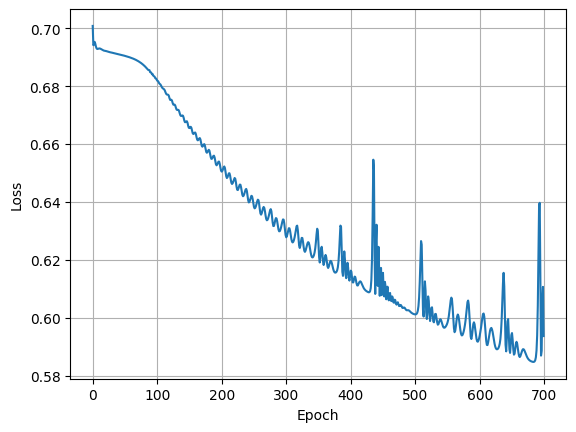

Validation Loss: 0.5845
Accuracy: 0.6942


In [243]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

class Model(nn.Module):
    def __init__(self, hiddenChannels):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(97, hiddenChannels)
#         self.fc11=nn.Linear(hiddenChannels,64)
        self.fc2 = nn.Linear(hiddenChannels, 32)
        self.fc3 = nn.Linear(32, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc11(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = Model(hiddenChannels=256)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)

# Convert data to PyTorch tensors
x = torch.tensor(df_train[[f'f{i}' for i in range(1, 98)]].values, dtype=torch.float32)
y = torch.tensor(df_train['target_sign'].values, dtype=torch.long)  # Use torch.long for class indices

# Training function
def train(x, y):
    model.train()
    optimizer.zero_grad()
    outputs = model(x)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Testing function (for validation)
def test(inputs, y):
    model.eval()
    with torch.no_grad():
        outputs = model(inputs)
        loss = loss_fn(outputs, y)
        _, predicted = torch.max(outputs, 1)
    return loss.item(),predicted

# Example training loop
train_losses=[]
epochs = 700
for epoch in range(epochs):
    train_loss = train(x, y)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}')

plt.plot(range(0,epochs),train_losses,label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

inputs = x  
y_test_tensor = y  
test_loss, predicted = test(inputs, y_test_tensor)
print(f'Validation Loss: {test_loss:.4f}')

# Calculate accuracy
accuracy = accuracy_score(y.numpy(), predicted.numpy())
print(f'Accuracy: {accuracy:.4f}')

## SGD is not working here  - 51% only
## Adam is working good
## Low learning rate as 0.001 is better than 0.01  - flacuation are more , also accuarcy drops
## Increasing the feature has also produced better results
## Increasing the layers has also given better results, but the loss function is now more flactuating.
## Lets run on the 500 epochs, giving one extra layers - 68%
## Lets run on the 500 epochs,not giving one extra layers - 63% but it is imroving at the constant and can improve more
## Lets run on the 700 epochs  - 70% percent reached.-- Finalized architecture

In [ ]:
## Lets make a combined Model now
from sklearn.preprocessing import PolynomialFeatures
class CombinedModel:
    def __init__(self,classifier,positive_regressor,negative_regressor,list1,lis2,list3,list4,list5):
        self.classifier=classfier
        self.positive_regressor=positive_regressor
        self.negative_regressor=negative_regressor
        
    def predict(self,x):
        x_copy=x
        index=89
        poly=PolynomialFeatures(degree=2,include_bias=False)
        selected_columns = [f'f{i}' for i in range(1, 87)]
        poly_features=poly.fit_transform(df_train_neg[selected_columns])
        names=poly.get_feature_names_out(selected_columns)
        df_new = pd.DataFrame(poly_features, columns=names)
        for i in range (len(list2)):
            x[f'f{index}']=x[f'f{list2[i]}']**0.5
            index+=1
        for i in range (len(list1)):
            x[f'f{index}']=df_new[f'{names[list1[i]]}']
            index+=1
        for i in range (89,index):
            x[f'f{i}'].fillna(x[f'f{i}'].mean(),inplace=True)
        if(target<0):
            index=89
            for i in range (len(list4)):
                x_copy[f'f{index}']=x_copy[f'f{list2[i]}']**0.5
                index+=1
            for i in range (len(list3)):
                x_copy[f'f{index}']=df_new[f'{names[list1[i]]}']
                index+=1
            for i in range (89,index):
                x[f'f{i}'].fillna(x[f'f{i}'].mean(),inplace=True)
            return positive_regressor(x_copy)
        else:
            index=89
            for i in range (len(list5)):
                x_copy[f'f{index}']=df_new[f'{names[list5[i]]}']**0.7
                index+=1
            for i in range (89,index):
                x[f'f{i}'].fillna(x[f'f{i}'].mean(),inplace=True)
            return -1 * negative_regressor(x_copy)

In [ ]:
final_model=CombinedModel(model,posreg,negreg)
final_model.predict(df_train)

---

## Pre-Processing

In this section, we load the training dataset and prepare it for model training by **extracting feature columns and handling missing values**. We replace NaN values in both the feature matrix and the target vector with zeros, ensuring the data is clean and ready for the machine learning pipeline.

In [52]:
# Prepare the feature matrix X and the target vector Y
X_train = df_train_neg[feats].to_numpy()
Y_train = df_train_neg['target_magnitude'].to_numpy()

# Display the shapes of X and Y matrices
print("X_train.shape:", X_train.shape, "\nY_train.shape:", Y_train.shape)

# Pre-processing functions to fill NaN values with zero
def process_X(X_inp):
    """
    Function to process the feature matrix X by replacing NaN values with zero.
    """
    out_X_inp = np.nan_to_num(X_inp)
    return out_X_inp

def process_Y(Y_inp):
    """
    Function to process the target vector Y by replacing NaN values with zero.
    """
    out_Y_inp = np.nan_to_num(Y_inp)
    return out_Y_inp

# Apply pre-processing to the training dataset
X_train = process_X(X_train)
Y_train = process_Y(Y_train)

X_train.shape: (52392, 87) 
Y_train.shape: (52392,)


---

## Model Training

In this step, we **train a simple linear regression model using the training data**. The model is fitted to predict stock returns based on the provided features. After training, we compute the Mean Squared Error (MSE) on the training set as a measure of the model's accuracy in predicting target values.

In [53]:
# Initialize and fit the linear regression model
reg = LinearRegression().fit(X_train, Y_train)

# Predict target values using the trained model
Y_train_pred = reg.predict(X_train)

# Calculate Mean Squared Error (MSE) for in-sample evaluation
mse_in_sample = mean_squared_error(Y_train, Y_train_pred)
print("MSE_In_Sample:", mse_in_sample)

MSE_In_Sample: 0.0022158992616531613


---

## Out-of-Sample Prediction

In this step, we **use the trained linear regression model to make predictions on the test dataset**. We preprocess the test features to handle any NaN values and then apply the model to predict the target values (stock returns) for the test data. These predictions are generated for submission to the Kaggle competition, where they will be evaluated against the true outcomes to assess the model's performance on unseen data.

In [49]:
# Load Test Dataset
df_test = pd.read_csv("/kaggle/input/interncompetitionnotebook/TQ_Test_Kaggle.csv")
print("df_test.shape:", df_test.shape)

print("\nTest Dataset columns:\n",list(df_test.columns))

# Prepare X_test matrix
X_test = df_test[feats].to_numpy()

# Apply Pre-Processing on Test Dataset
X_test = process_X(X_test)

# Predict Y_test_pred using the trained linear regression model
Y_test_pred = reg.predict(X_test)

print("\nGenerating Predictions: Success")

df_test.shape: (85821, 88)

Test Dataset columns:
 ['row_id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87']

Generating Predictions: Success


---

## Output File Generation

In this final step, we format and save the predictions for the test dataset into a CSV file named `predictions.csv`. This file should be submitted to Kaggle for evaluation. The predictions include `row_id`, which identifies each row in the test dataset, and `target`, which contains the predicted values (stock returns) generated by our trained linear regression model.

In [50]:
# Create DataFrame for predictions
df_output = pd.DataFrame({"row_id": np.array(df_test['row_id']), 'target': Y_test_pred})

# Define filename for saving predictions
filename = "/kaggle/working/predictions.csv"

# Save predictions to CSV file
df_output.to_csv(filename, index=False)

print(f"Successfully Saved in File: {filename}")
print('\nParticipants can download "predictions.csv" and upload it using the "Submit Prediction" button on the competition page.')

# Display the first 10 rows of predictions DataFrame
print("\nFirst few rows of saved predictions:")
display(df_output.head(n=10))

Successfully Saved in File: /kaggle/working/predictions.csv

Participants can download "predictions.csv" and upload it using the "Submit Prediction" button on the competition page.

First few rows of saved predictions:


,row_id,target
0,44,0.01
1,45,0.01
2,46,-0.00
3,47,0.00
4,48,-0.00
5,49,-0.00
6,50,0.00
7,51,0.00
8,52,-0.01
9,53,-0.00
